## Parte 1: Scaricamento dei dati e visualizzazione dei grafici

MSFT:
                  High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2011-11-30  25.590000  25.139999  25.370001  25.580000  81350900.0  20.704651
2011-12-01  25.629999  25.200001  25.559999  25.280001  48545400.0  20.461826
2011-12-02  25.620001  25.160000  25.590000  25.219999  52293800.0  20.413265
2011-12-05  25.799999  25.500000  25.780001  25.700001  56818400.0  20.801781
2011-12-06  25.870001  25.610001  25.809999  25.660000  46175300.0  20.769400 

GOOG:
                   High         Low        Open       Close     Volume  \
Date                                                                    
2011-11-30  298.635651  294.939484  297.858551  298.575867  6819466.0   
2011-12-01  306.849854  298.381592  298.879730  305.739014  7268342.0   
2011-12-02  310.834900  306.979370  307.372894  309.021698  8202028.0   
2011-12-05  314.770172  310.037903  312.648132  311.656830  6418970.0   


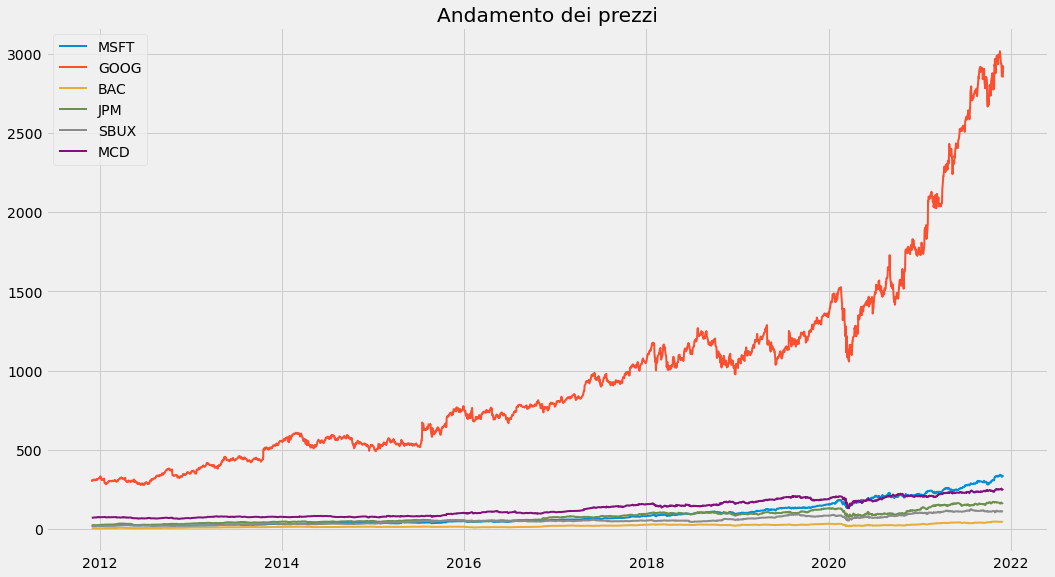

In [208]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
plt.style.use('fivethirtyeight')


#Definisco le date di riferimento
start_date = '2011-11-30'
end_date = '2021-11-30'

#Specifico la lista di tickers che mi interessano
tickers = ['MSFT', 'GOOG', 'BAC', 'JPM', 'SBUX', 'MCD']

#Inizializzo il dictionary principale che conerrà i dataframe relativi agli stock
datasets = {}


plt.figure(figsize=(16, 9))
for ticker in tickers:
    #plt.figure(figsize=(16, 9))
    #Scarico i dati da yahoo e faccio un grafico dei prezzi
    datasets[ticker] = web.get_data_yahoo(ticker, start_date, end_date)
    plt.title('Andamento dei prezzi')
    plt.grid(True)
    plt.plot(datasets[ticker]['Adj Close'], label = ticker, linewidth = 2)
    plt.legend()

    # Salvo il DataFrame in formato LaTeX per la relazione
    datasets[ticker].head().to_latex('head_' + ticker + '.tex')
    print(ticker + ':\n', datasets[ticker].head(), '\n')

#Salvo l'immagine
plt.savefig('./immagini/prezzi.png')

/Users/gabrielecanesi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/gabrielecanesi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/gabrielecanesi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/gabrielecanesi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWar

===STATISTICHE UNIVARIATE===

MSFT:
Media: 0.0012299138430726549
Varianza: 0.0003
Deviazione Stamdard: 0.016012080062742618
Asimmetria: 0.04279987057140753
Curtosi: 10.772845118504478

GOOG:
Media: 0.0010223309900170476
Varianza: 0.0003
Deviazione Stamdard: 0.015880523060674858
Asimmetria: 0.5573908168327004
Curtosi: 11.195789284117156

BAC:
Media: 0.0010902381286300436
Varianza: 0.0004
Deviazione Stamdard: 0.01998628166017725
Asimmetria: 0.264781563370011
Curtosi: 9.153666196624338

JPM:
Media: 0.0009034740343949975
Varianza: 0.0003
Deviazione Stamdard: 0.016977515584507108
Asimmetria: 0.280465974628205
Curtosi: 14.25692926186896

SBUX:
Media: 0.0008329310538169812
Varianza: 0.0002
Deviazione Stamdard: 0.015686888724511894
Asimmetria: -0.007010700952465591
Curtosi: 14.400956446836728

MCD:
Media: 0.0005609243419315578
Varianza: 0.0001
Deviazione Stamdard: 0.012213629143589753
Asimmetria: 0.5369020677378841
Curtosi: 38.57043794255454

        MSFT    GOOG     BAC     JPM    SBUX     MC

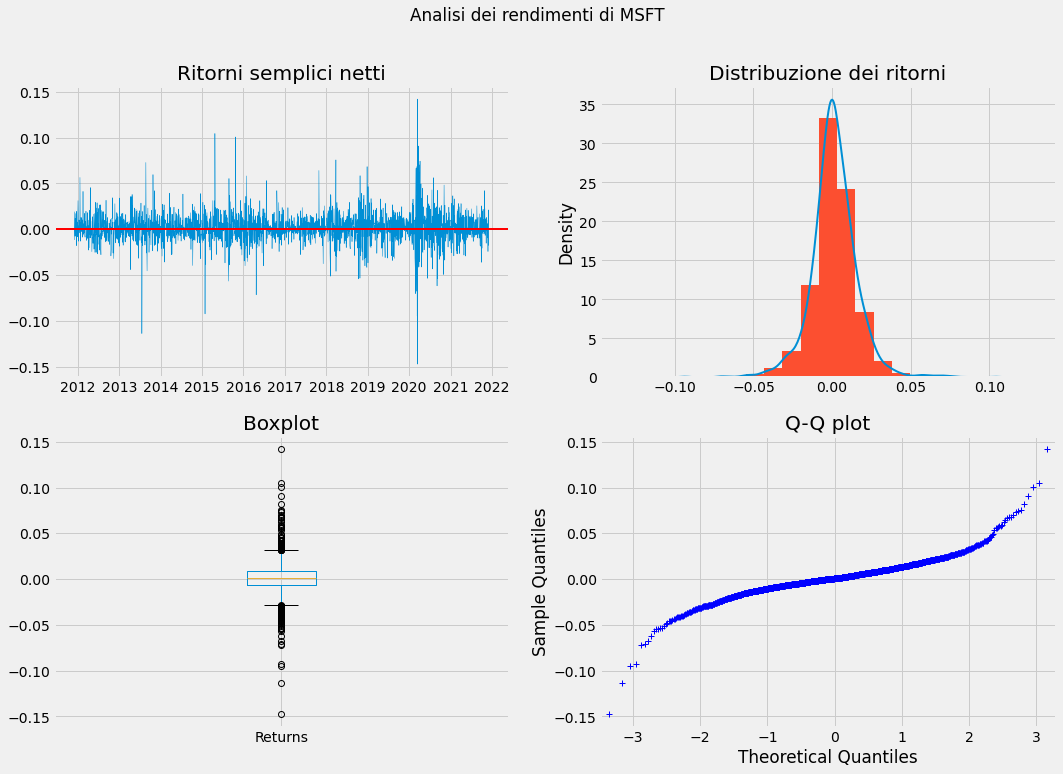

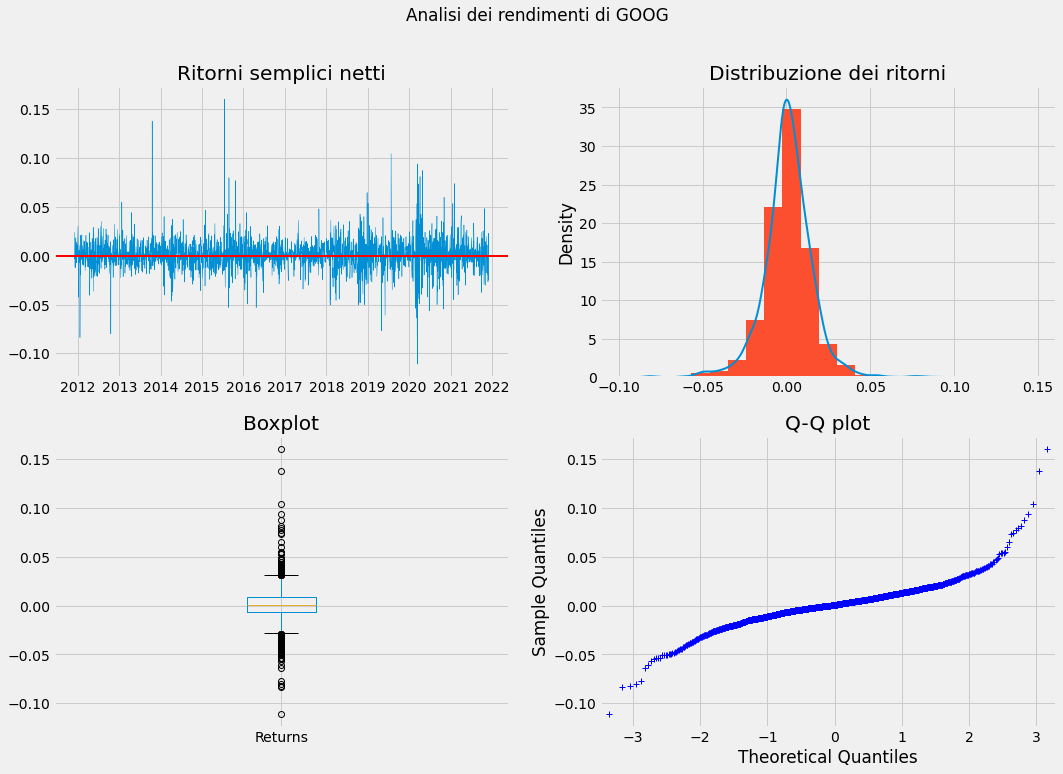

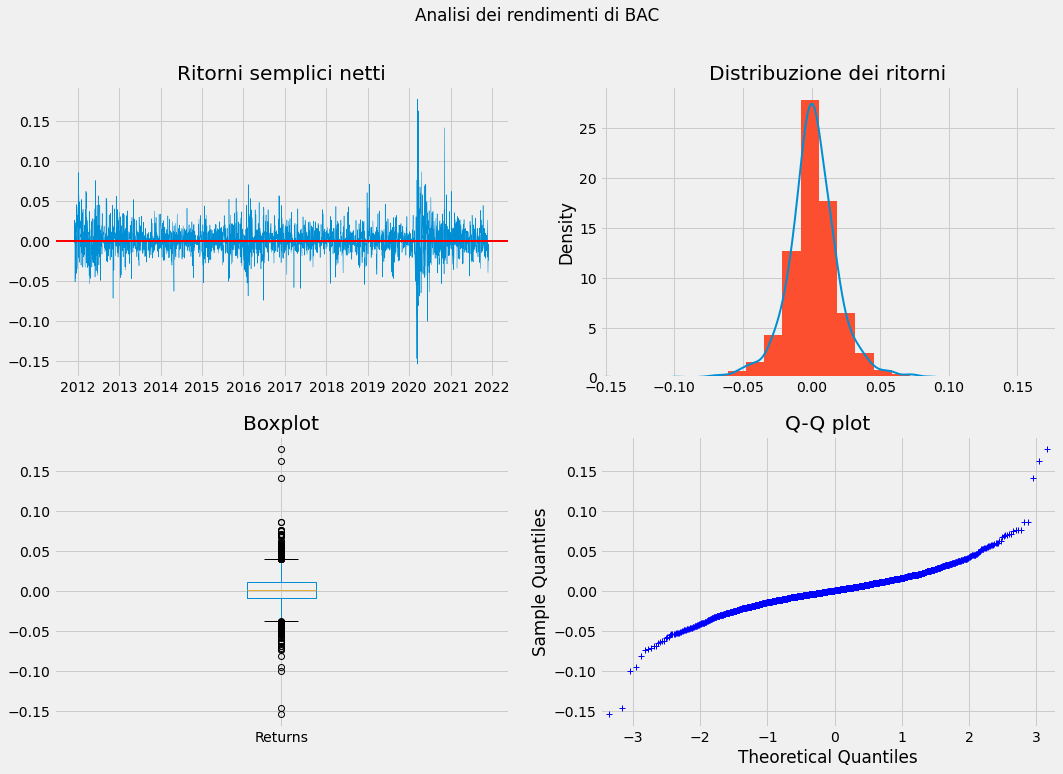

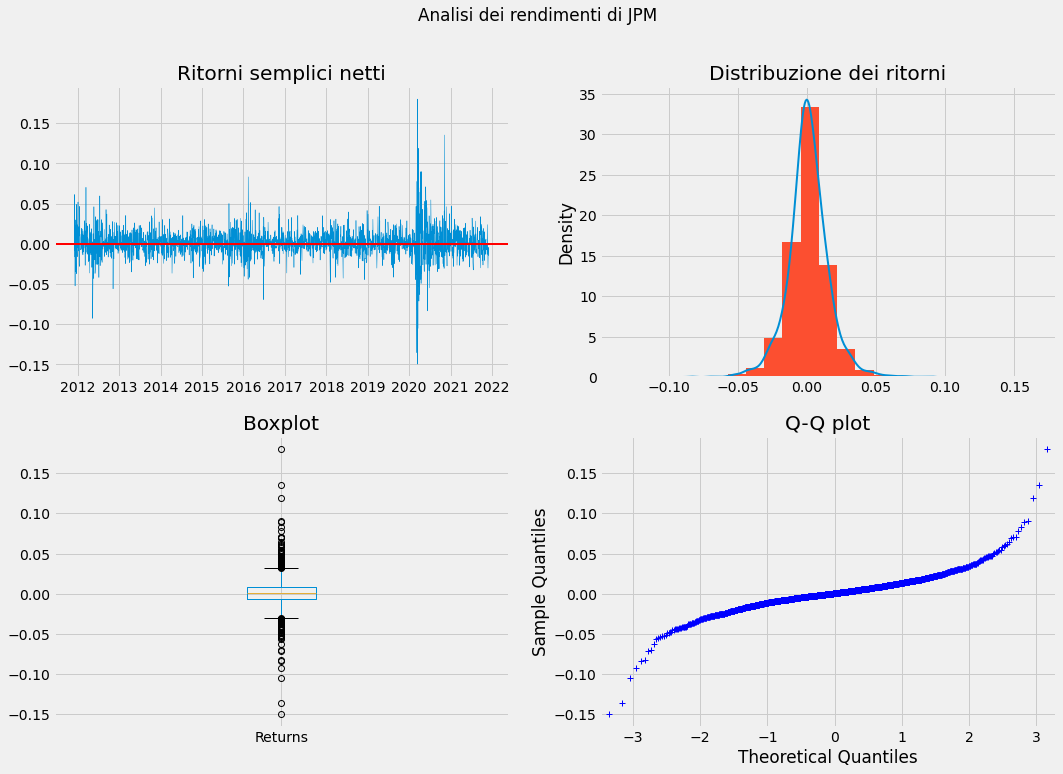

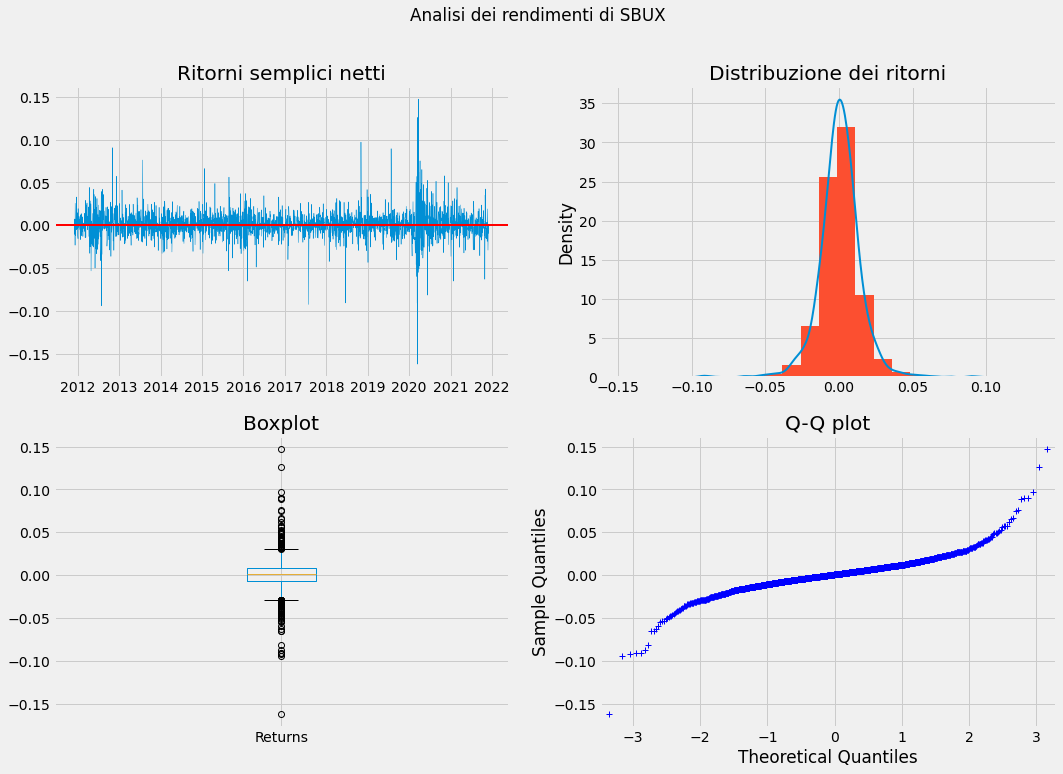

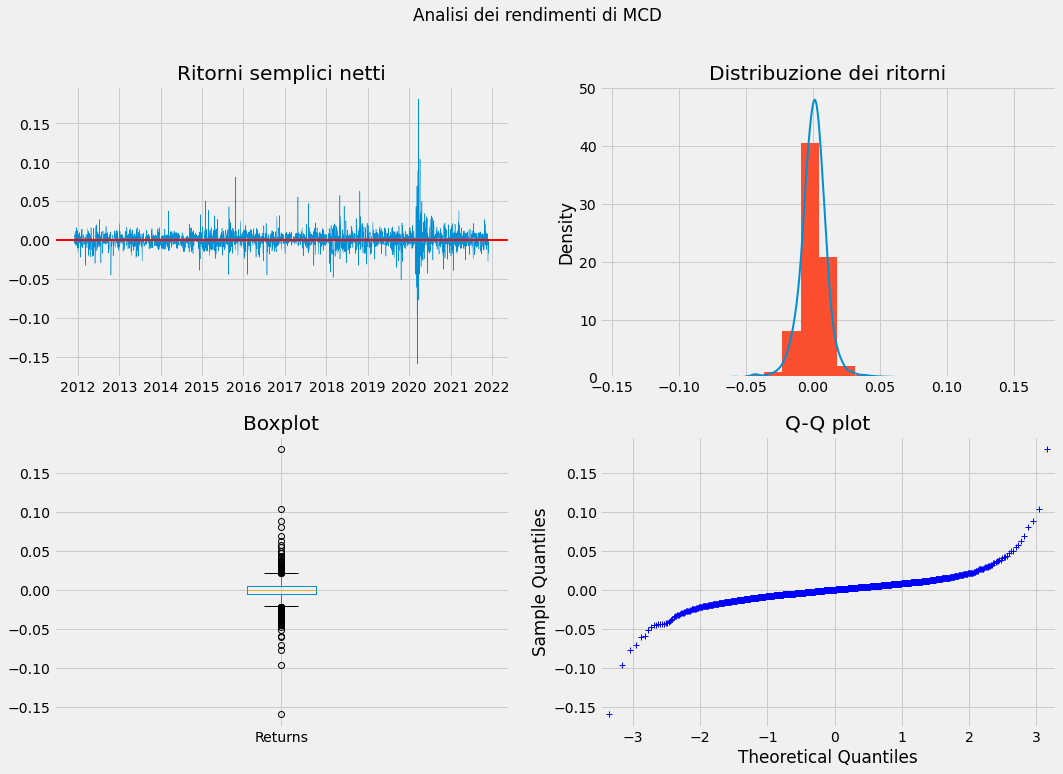

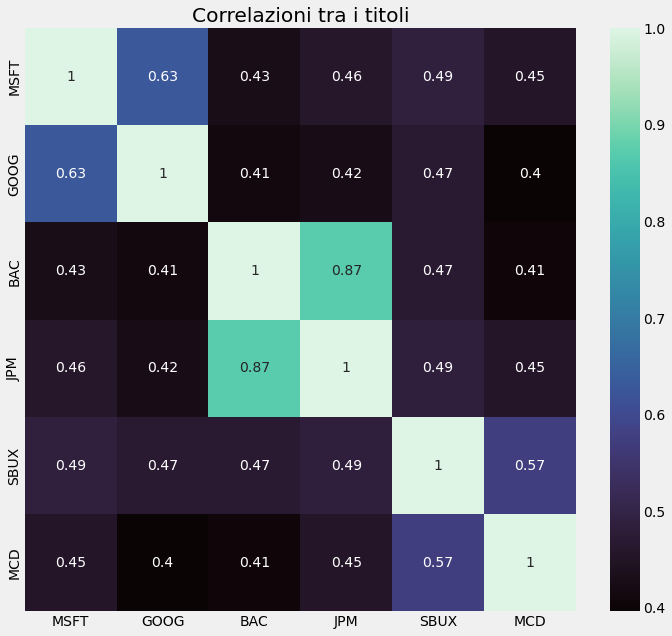

In [185]:
import statsmodels.api as sm
import seaborn as sns

# Creo un dataframe temporaneo per calcolare covarianza e correlazione più tardi
returns = pd.DataFrame()

# Scorro tutti i ticker
for ticker in tickers:

    # Creo un grafico 2X2 che contiene i dati relativi alla distribuzione dei ritorni
    fig, axes = plt.subplots(2, 2, figsize = (16, 11))
    fig.suptitle('Analisi dei rendimenti di ' + ticker)
    datasets[ticker]['Returns'] = datasets[ticker]['Adj Close'].pct_change()
    datasets[ticker]['Compounded_returns'] = (datasets[ticker]['Returns'] + 1).cumprod()
    returns[ticker] = datasets[ticker]['Returns']
    axes[0][0].plot(datasets[ticker]['Returns'] , linewidth=0.5)
    axes[0][0].set_title('Ritorni semplici netti')
    axes[0][0].axhline(0, color = 'r', linewidth = 2)
    datasets[ticker]['Returns'] .plot.kde(ax = axes[0][1], alpha=1, linewidth=2)
    axes[0][1].set_title('Distribuzione dei ritorni')
    axes[0][1].set_xlim([datasets[ticker]['Returns'].min(), datasets[ticker]['Returns'].max()])
    axes[0][1].hist(datasets[ticker]['Returns'] , density=True, bins=25)
    axes[1][0].set_title('Boxplot')
    axes[1][1].set_title('Q-Q plot')
    datasets[ticker]['Returns'] .to_frame().boxplot(ax = axes[1][0])
    sm.qqplot(datasets[ticker]['Returns'] , ax=axes[1][1], marker='+')

    #Salvo il grafico
    plt.savefig('./immagini/' + ticker + '_diagnostico.png')


# Calcolo e stampo alcune statistiche dei singoli stock
print('===STATISTICHE UNIVARIATE===\n')
for ticker in tickers:
    print(ticker + ':')
    print('Media: ' + str(datasets[ticker]['Returns'].mean()))
    std = datasets[ticker]['Returns'] .std()
    var = datasets[ticker]['Returns'] .var()
    print('Varianza: ' + str(np.round(std ** 2, 4)))
    print('Deviazione Stamdard: ' + str(std))
    print('Asimmetria: ' + str(datasets[ticker]['Returns'] .skew()))
    print('Curtosi: ' + str(datasets[ticker]['Returns'] .kurtosis()) + '\n')

print(np.round(returns.cov(), 4))

returns.cov().to_latex('cov_mat.tex')
# Creo il grafico di correlazione
plt.figure(figsize=(11, 10))
plt.title('Correlazioni tra i titoli')
sns.heatmap(returns.corr(), annot = True, cmap='mako')
plt.savefig('./immagini/Correlazioni.png')
plt.show()


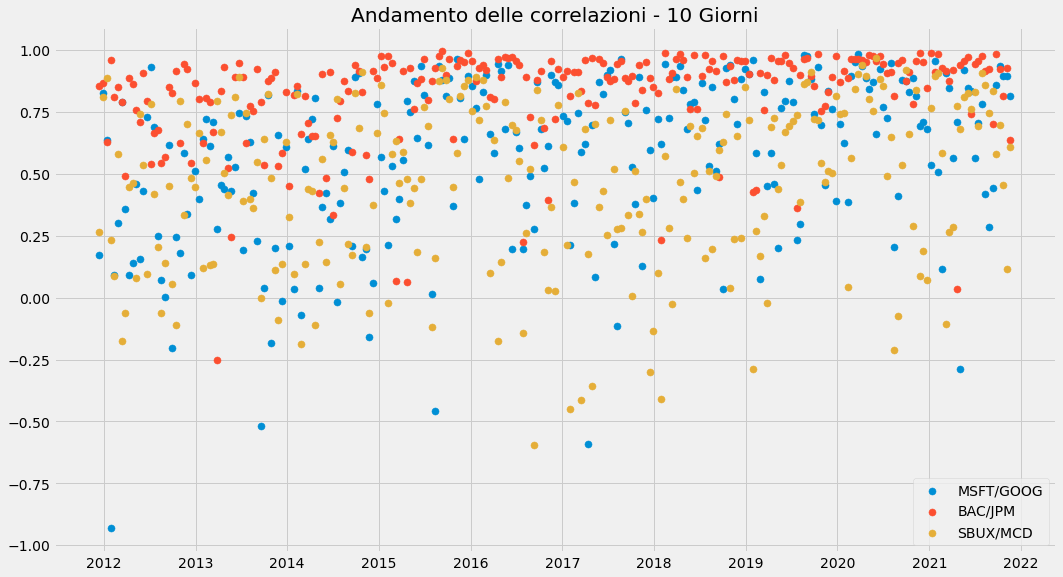

In [209]:
#Calcolo l'andamento delle correlazioni tra i titoli

#Specifico la dimensione della finestra da considerare
window = 10

plt.figure(figsize = (16, 9))
# Ciclo ogni coppia di ticker in modo da non prendere più volte la stessa coppia
for ticks in [[tickers[0], tickers[1]], [tickers[2], tickers[3]], [tickers[4], tickers[5]]]:
    t1 = ticks[0]
    t2 = ticks[1]
    plt.title('Andamento delle correlazioni - ' + str(window) + ' Giorni')
    correlations = []
    indexes = []

    # Ciclo il periodo saltando da una finestra di tempo a quella successiva
    for i in range(0, returns[t1].shape[0] - window, window):

        # Calcolo la correlazione nella finestra corrente
        df = pd.DataFrame({t1: returns[t1].iloc[i:i + window], t2: returns[t2].iloc[i:i + window]})
        correlations.append(df.corr()[t1][t2])
        indexes.append(returns[t1].index[i + window])

    # Creo il grafico passando come x le date e come y i valori delle correlazioni
    plt.scatter(indexes, correlations, label = t1 + '/' + t2, s = 50)

# Salvo il grafico
plt.legend()
plt.savefig('./immagini/correlazioni_scatter.png')


## Previsione con rete neurale

Epoch 1/6
1254/1254 [==============================] - 2s 923us/step - loss: 6.6086 - mape: 14.5482
Epoch 2/6
1254/1254 [==============================] - 1s 1ms/step - loss: 3.9820 - mape: 9.1713
Epoch 3/6
1254/1254 [==============================] - 1s 1ms/step - loss: 3.9487 - mape: 9.1067
Epoch 4/6
1254/1254 [==============================] - 1s 955us/step - loss: 3.9317 - mape: 9.0844
Epoch 5/6
1254/1254 [==============================] - 2s 1ms/step - loss: 3.9203 - mape: 9.0677
Epoch 6/6
7/7 [==============================] - 0s 4ms/step - loss: 18.8498 - mape: 10.5485
[18.84977912902832, 10.54845905303955]
Epoch 1/7
627/627 [==============================] - 1s 966us/step - loss: 10.7615 - mape: 23.6400
Epoch 2/7
627/627 [==============================] - 1s 859us/step - loss: 3.9495 - mape: 9.1110
Epoch 3/7
627/627 [==============================] - 0s 750us/step - loss: 3.9490 - mape: 9.0895
Epoch 4/7
627/627 [==============================] - 0s 742us/step - loss: 3.9326 - m

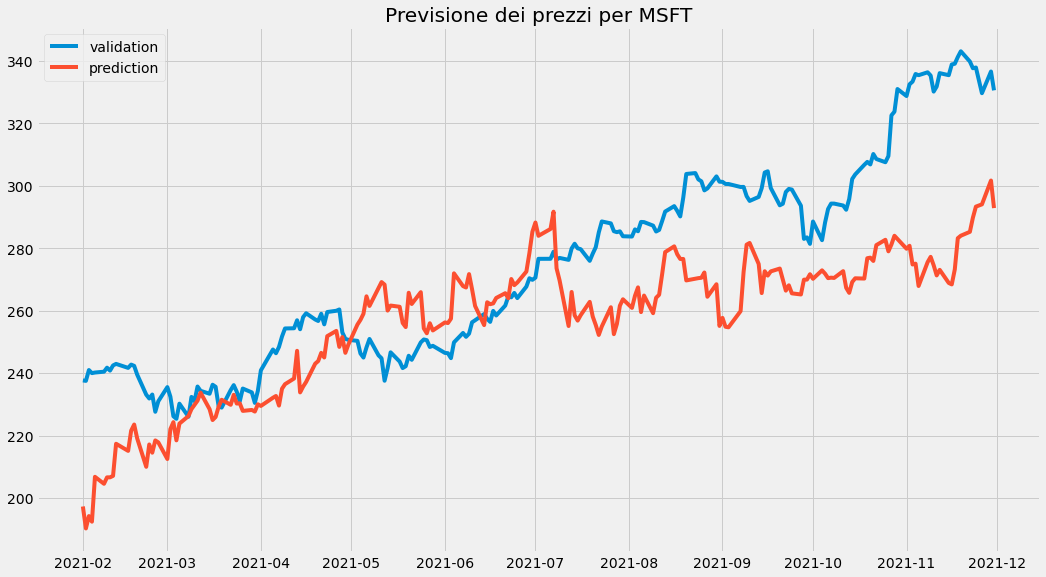

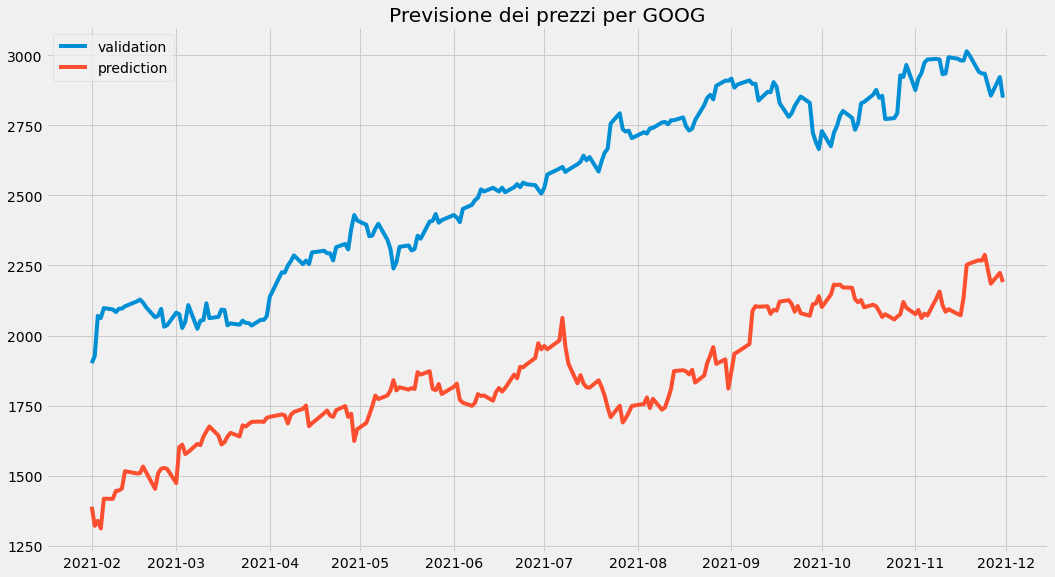

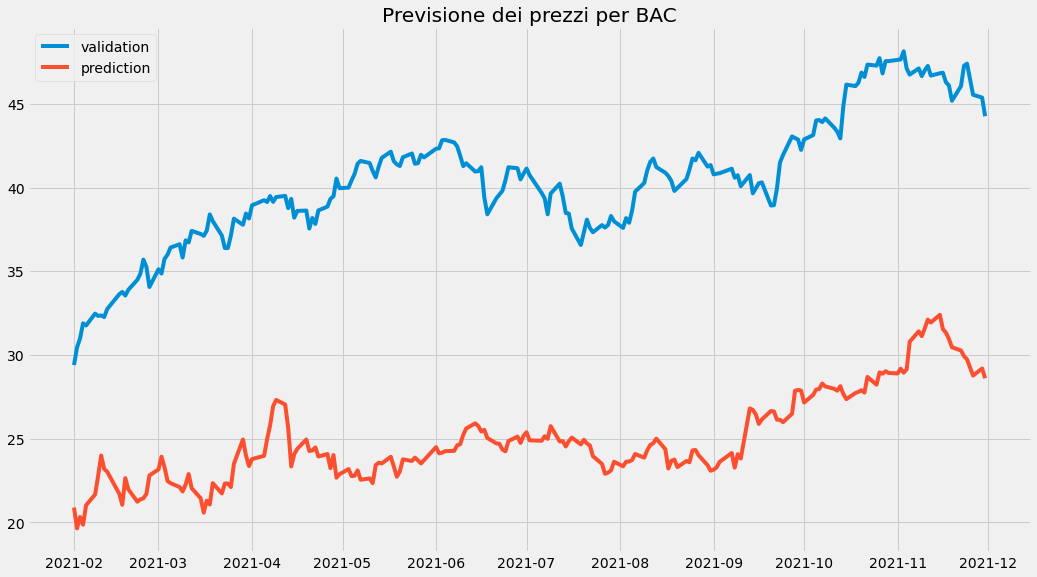

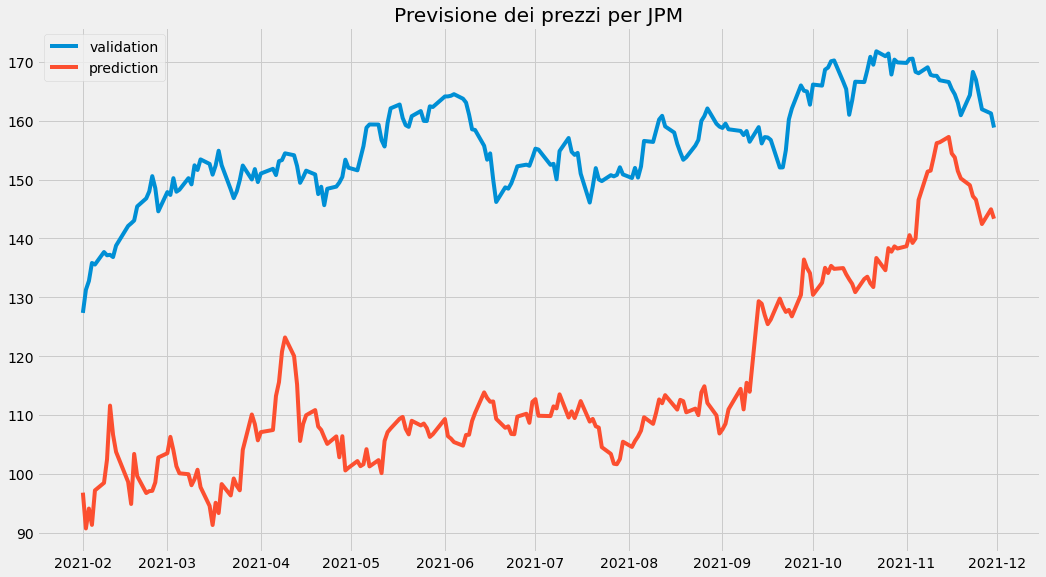

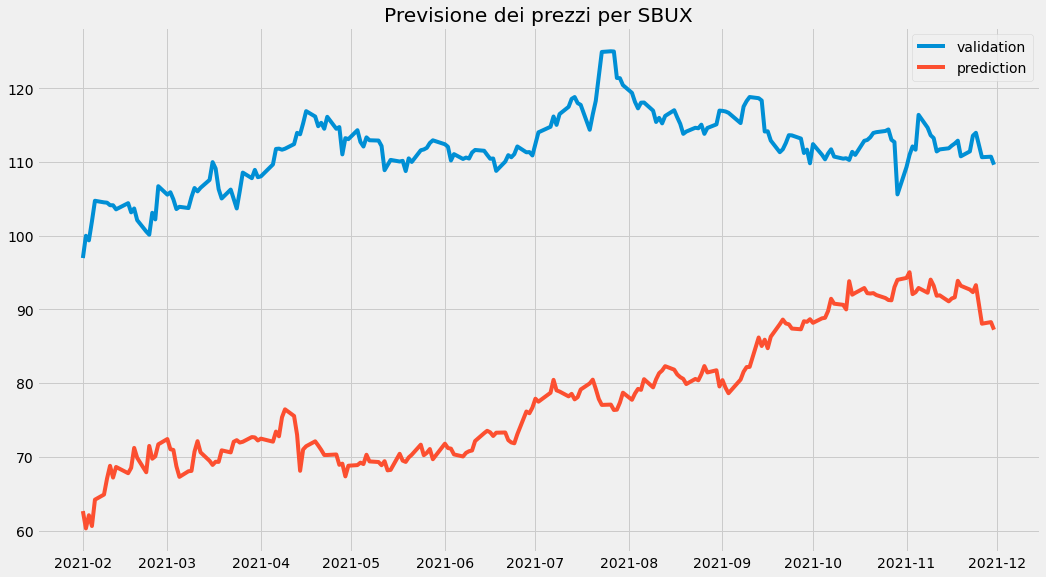

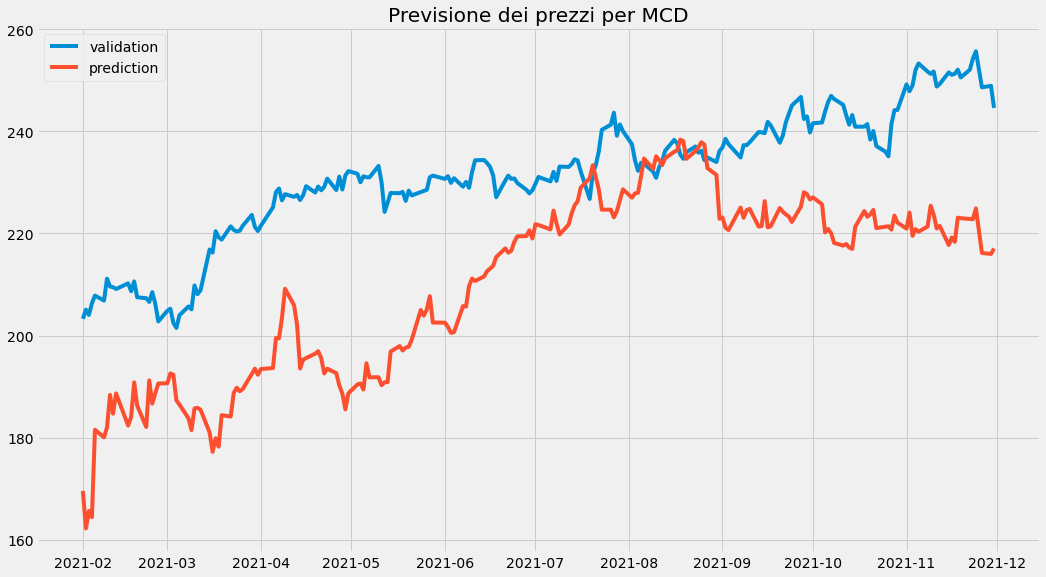

In [119]:
from tensorflow import keras
import tensorflow as tf

val = datasets[tickers[0]].loc['2021-01-31' : '2021-11-30']
best_models = {}
# Inizializzo il dataframe con le previsioni, usando le date come indice
predicted = pd.DataFrame(index = datasets[tickers[0]]['Adj Close'].index[datasets[tickers[0]]['Adj Close'].shape[0] - val.shape[0]:])
for ticker in tickers:
    best_models[ticker] = None
    # Divido i dati in 80 mesi di train, 30 di test e 10 di valiazione
    train = datasets[ticker]['Adj Close'].loc[start_date : '2018-07-30']
    test = datasets[ticker]['Adj Close'].loc['2018-07-31':'2021-01-30']
    validation = datasets[ticker]['Adj Close'].loc['2021-01-31':'2021-11-30']

    # Inizializzo le dimensioni dell'input e dell'output
    window_size = output_size = validation.shape[0]

    best_model = None
    best_performance = None


    # Scorro un intero per fare la ricerca dell'iperparametro migliore nel modello (epochs e batch size)
    for i in range(1, 30):

        # Creo gli input e gli output di training e test
        train_inputs = np.asarray([train[i:i+window_size] for i in range(0, train.shape[0] - output_size - window_size)]).reshape((train.shape[0] - window_size - output_size, window_size, 1))
        train_outputs = np.asarray([train[i + window_size:i + window_size + output_size] for i in range(0, train_inputs.shape[0])]).reshape((train_inputs.shape[0], output_size, 1))

        test_inputs = np.asarray([test[i:i+window_size] for i in range(test.shape[0] - window_size - output_size)]).reshape((test.shape[0] - window_size - output_size, window_size, 1))
        test_outputs = np.asarray([test[i + window_size : i + window_size + output_size] for i in range(0, test_inputs.shape[0])]).reshape((test_inputs.shape[0], output_size, 1))

        # Costruisco il modello con un layer di 50 neuroni
        model = keras.Sequential([
            keras.layers.Dense(50, activation = 'relu'),
            keras.layers.Dense(1)
        ])

        # Compilo il modello con loss function mean absolute error e come metrica l'errore percentuale
        model.compile(
            optimizer = keras.optimizers.Adam(),
            loss='mae',
            metrics = ['mape']
        )

        # Avvio il processo di learning dai dati di training
        model.fit(train_inputs, train_outputs, epochs = i + 5, batch_size=i)

        # valuto il modello e lo sostituisco a quello corrente, se ottiene un errore minore sui dati di test
        performance = model.evaluate(test_inputs, test_outputs)
        print(performance)

        if best_performance is None or performance[1] < best_performance[1]:
            best_model = model
            best_performance = performance
            best_models[ticker] = model

    # Avvio la predizione sugli ultimi 10 mesi
    predictions = pd.DataFrame(
        best_model.predict(np.asarray(datasets[ticker]['Adj Close'][datasets[ticker].shape[0] - validation.shape[0] - window_size : datasets[ticker].shape[0] - validation.shape[0]]).reshape(1, window_size))[0],
        index=datasets[tickers[0]]['Adj Close'].index[datasets[tickers[0]]['Adj Close'].shape[0] - output_size:])


    predicted[ticker] = predictions

    # Faccio un grafico che confronta il vero andamento con quello predetto dal modello
    plt.figure(figsize=(16, 9))
    plt.title('Previsione dei prezzi per ' + ticker)
    plt.plot(validation, label = 'validation')
    plt.plot(predictions, label = 'prediction')
    plt.legend()

    # Salvo il grafico
    plt.savefig('./immagini/' + ticker + '_forecast.png')

In [207]:
predicted_df = pd.DataFrame(index = ['Errore %', 'Correlazione'])



for ticker in tickers:
    validation = datasets[ticker]['Adj Close'].loc['2021-01-31':'2021-11-30']
    validation_inputs = np.asarray(datasets[ticker]['Adj Close'][datasets[ticker].shape[0] - validation.shape[0] - window_size : datasets[ticker].shape[0] - validation.shape[0]]).reshape(1, window_size)

    validation_outputs = np.asarray(validation).reshape(1, validation.shape[0])
    temp = pd.DataFrame()
    real_prices = datasets[ticker]['Adj Close'].loc['2021-01-30':]
    temp['real'] = real_prices
    temp['pred'] = predicted[ticker]
    predicted_df[ticker] = [best_models[ticker].evaluate(validation_inputs, validation_outputs)[1], temp.corr().iloc[0, 1]]

print(predicted_df)
predicted_df.to_latex('previsioni_prestazioni.tex')

1/1 [==============================] - 0s 17ms/step - loss: 21.4844 - mape: 9.3503
                  MSFT       GOOG        BAC        JPM       SBUX       MCD
Errore %      7.803641  26.870054  38.096722  26.499479  30.321783  9.350307
Correlazione  0.752091   0.845179   0.816226   0.726767   0.386486  0.765910


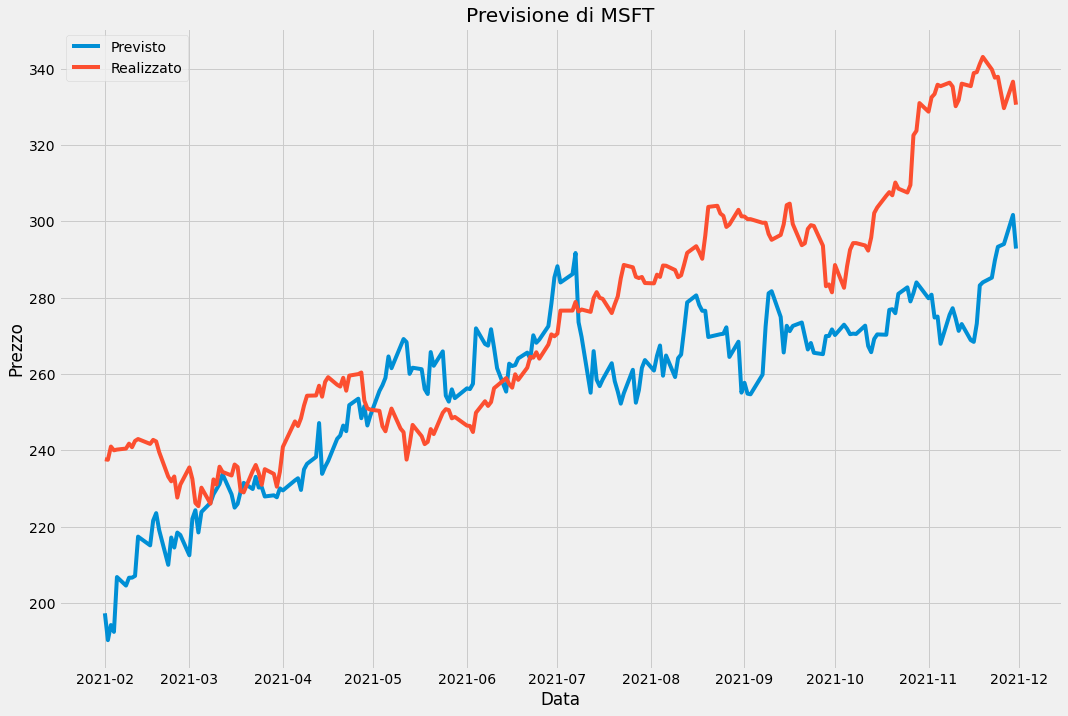

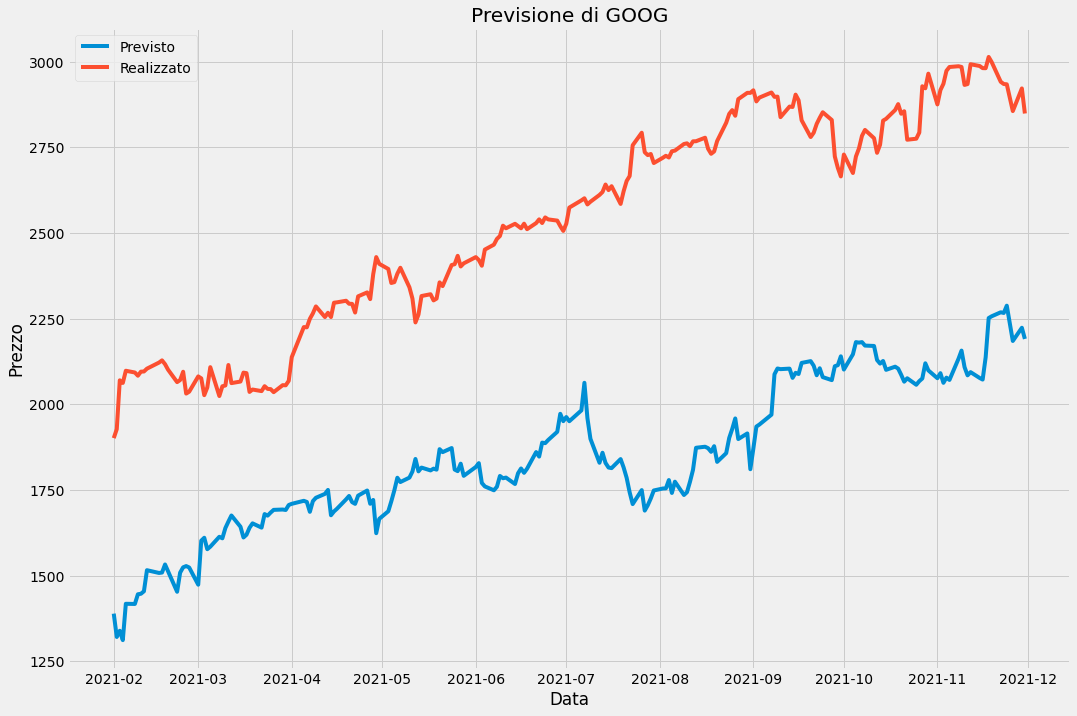

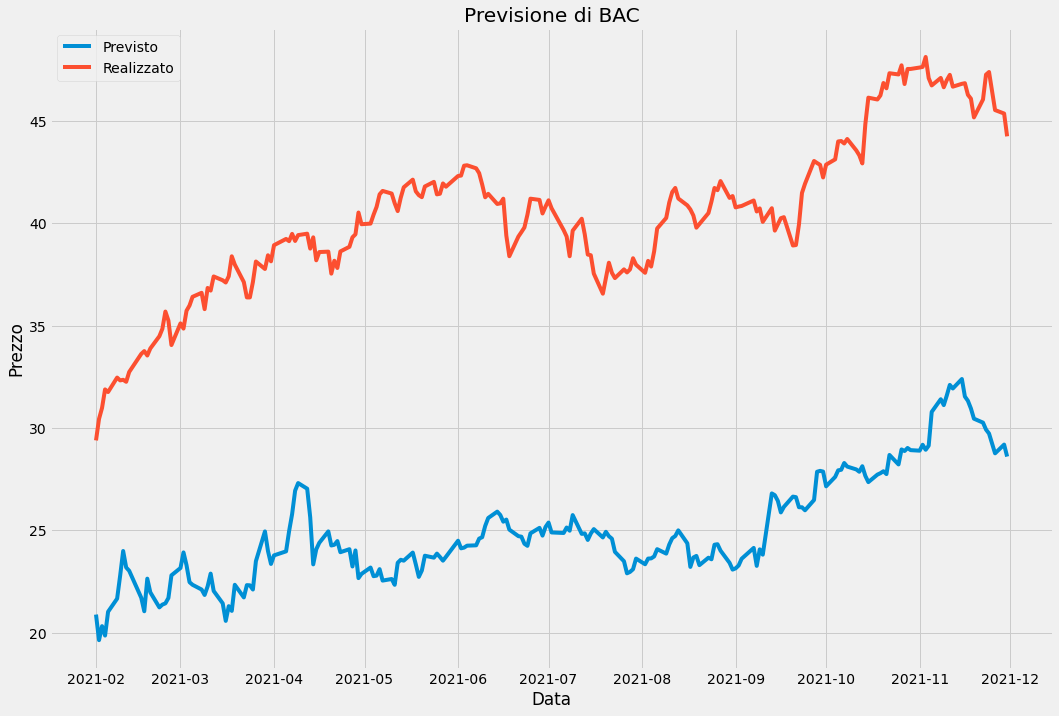

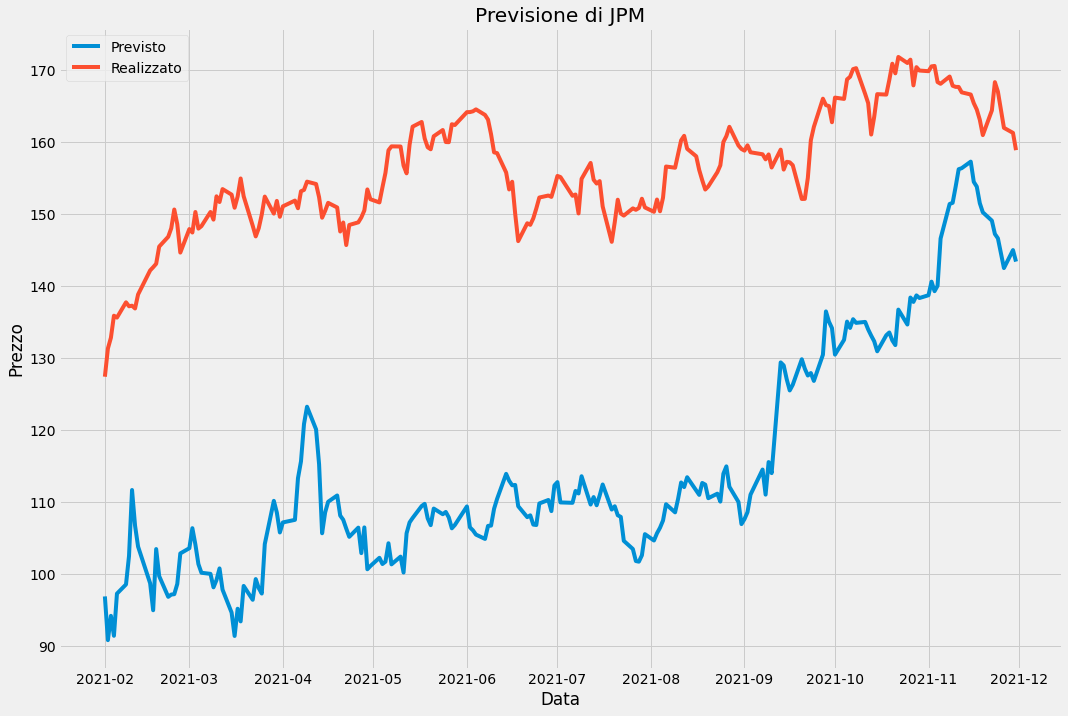

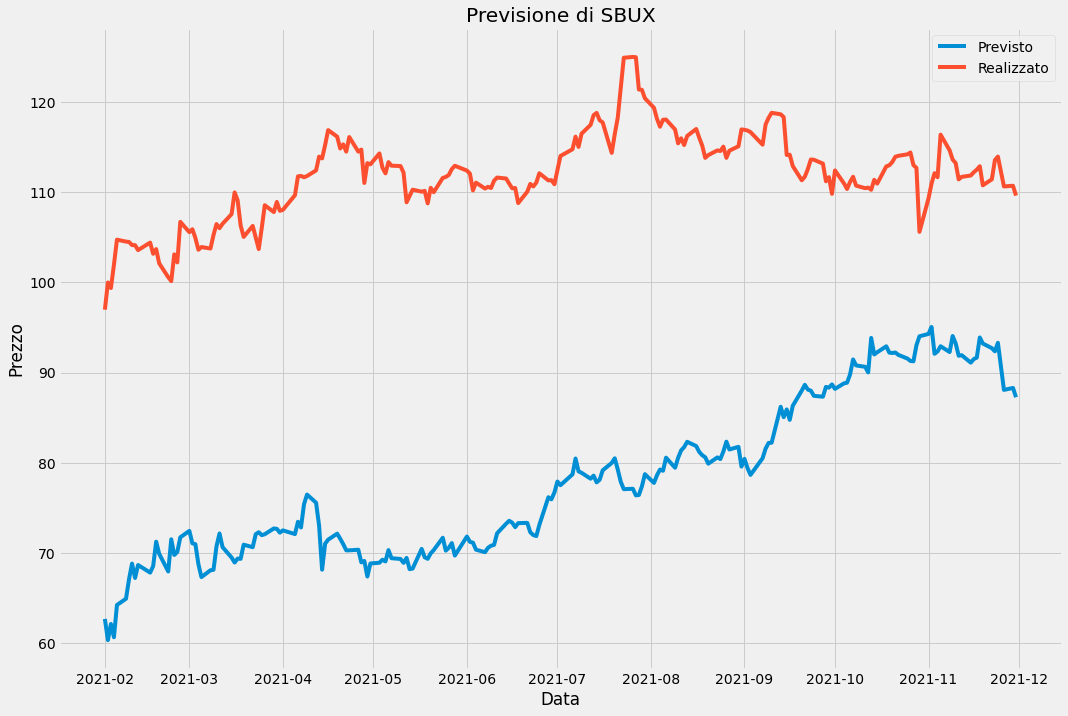

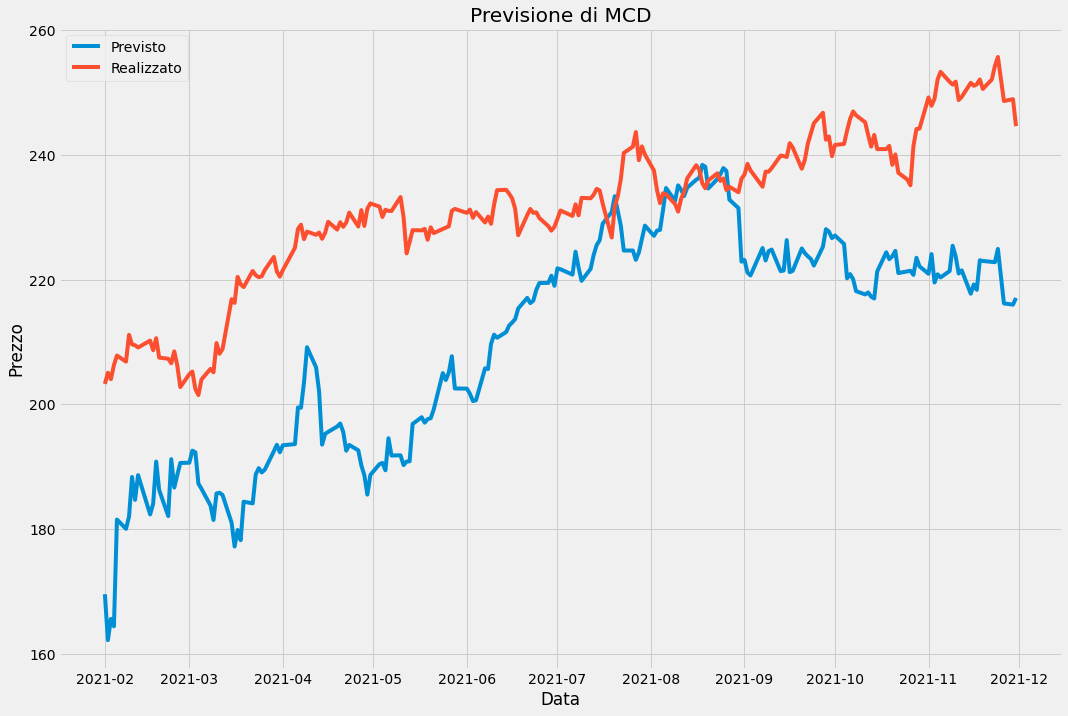

In [189]:
for ticker in tickers:
    out = predictions = pd.DataFrame(
        best_models[ticker].predict(np.asarray(datasets[ticker]['Adj Close'][datasets[ticker].shape[0] - validation.shape[0] - window_size : datasets[ticker].shape[0] - validation.shape[0]]).reshape(1, window_size))[0],
        index=datasets[tickers[0]]['Adj Close'].index[datasets[tickers[0]]['Adj Close'].shape[0] - output_size:])

    plt.figure(figsize=(16, 11))
    plt.title('Previsione di ' + ticker)
    plt.plot(out, label = 'Previsto')
    plt.plot(datasets[ticker]['Adj Close'].loc['2021-01-31':], label = 'Realizzato')
    plt.legend()
    plt.ylabel('Prezzo')
    plt.xlabel('Data')
    plt.savefig('./immagini/' + ticker + '_forecast.png')


## Capital Asset Pricing Model

#### Calcolo del Beta dei titoli

In [151]:
import pandas_datareader as web

# Inizializzo il dictionary che conterrà i beta e scarico i dati di S&P500
betas = pd.DataFrame(index=['Beta', 'Exp_return'])
sp500 = web.get_data_yahoo('^GSPC', start_date, end_date)
sp500_returns = sp500['Adj Close'].resample('M').last().pct_change()
# Calcolo il beta di ogni titolo
for ticker in tickers:
    temp = pd.DataFrame()
    temp[ticker] = datasets[ticker]['Adj Close'].resample('M').last().pct_change()
    temp['Benchmark'] = sp500_returns
    cov_mat = temp.cov()

    # Il beta è dato dal rapporto tra la covarianza tra titolo e mercato e la varianza del mercato
    betas[ticker] = cov_mat[ticker]['Benchmark'] / cov_mat['Benchmark']['Benchmark']

pd.DataFrame(betas).to_latex('beta.tex')
print(betas)

# Calcolo il ritorno atteso utilizzando il beta dei titoli
# Utilizzo un tasso risk-free nullo
risk_free_rate = 0
for ticker in tickers:
    betas[ticker].loc['Exp_return'] = risk_free_rate + betas[ticker].loc['Beta'] * (sp500_returns.mean() * 12 - risk_free_rate)
print(betas)
betas.to_latex('CAPM.tex')

                MSFT      GOOG       BAC       JPM      SBUX       MCD
Beta        0.961292  1.018338  1.519352  1.264511  0.805962  0.612571
Exp_return  0.961292  1.018338  1.519352  1.264511  0.805962  0.612571
                MSFT      GOOG       BAC       JPM      SBUX       MCD
Beta        0.961292  1.018338  1.519352  1.264511  0.805962  0.612571
Exp_return  0.133592  0.141520  0.211146  0.175731  0.112006  0.085130


### Modello Fama-French a tre fattori

In [10]:
import statsmodels.formula.api as smf


ff_regression_results = pd.DataFrame(index=['Intercept', 'MKT', 'SMB', 'HML', 'R squared'])
ff_pvalues = pd.DataFrame(index = ['Intercept', 'MKT', 'SMB', 'HML'])

# Salvo il CSV dei fattori
factors = pd.read_csv('F-F_Research_Data_Factors.CSV', skiprows=3)

# Rimuovo la parte dei fattori annuali e tengo solo i mensili
factors = factors[factors.index < factors[factors.iloc[:, 0] == " Annual Factors: January-December "].index[0]]

# Rinomino le colonne del dataframe
factors.columns = ['Date', 'MKT', 'SMB', 'HML', 'RF']
factors['Date'] = pd.to_datetime(factors['Date'], format = '%Y%m').dt.strftime('%Y-%m')
factors = factors.set_index('Date')
factors = factors[start_date : end_date]

factors = factors.apply(pd.to_numeric, errors = 'coerce').div(100)

# Scorro i ticker per calcolare l'esposizione ai fattori Fama-French
for ticker in tickers:
    # Calcolo i ritorni semplici con granularità mensile
    y = datasets[ticker]['Adj Close'].resample('M').last().pct_change()

    # Aggiusto l'indice con la formattazione YYYY-MM
    y.index = y.index.strftime('%Y-%m')
    # Nomino la colonna del dataframe con il ticker
    y.name = ticker
    ff_data = factors.join(y)
    # Converto le colonne in float per evitare problemi di conversione di tipo

    ff_data['excess_return'] = ff_data[ticker] - ff_data['RF']

    # Avvio il modello di regressione basato sui parametri Fama-French e controllo i parametri trovati
    ff_model = smf.ols('excess_return ~ MKT + SMB + HML', data=ff_data).fit()
    ff_regression_results[ticker] = np.concatenate([ff_model.params, [ff_model.rsquared_adj]])
    ff_pvalues[ticker] = np.round(ff_model.pvalues, 3)

ff_regression_results = np.round(ff_regression_results, 3)

ff_pvalues.to_latex('Fama-French-pvalues.tex')
ff_regression_results.to_latex('Fama-French-regression.tex')

print(ff_regression_results, '\n')
print(ff_pvalues)

            MSFT   GOOG    BAC    JPM   SBUX    MCD
Intercept  0.011  0.007  0.008  0.006  0.006  0.003
MKT        1.027  1.048  1.335  1.113  0.807  0.647
SMB       -0.650 -0.538  0.207  0.011 -0.224 -0.611
HML       -0.278 -0.128  1.088  1.011  0.057  0.136
R squared  0.423  0.374  0.591  0.681  0.235  0.344 

            MSFT   GOOG    BAC    JPM   SBUX    MCD
Intercept  0.016  0.160  0.166  0.107  0.280  0.445
MKT        0.000  0.000  0.000  0.000  0.000  0.000
SMB        0.000  0.007  0.349  0.944  0.292  0.000
HML        0.049  0.411  0.000  0.000  0.730  0.216


## Strategie di trading

### Strategia 1: medie mobili sui prezzi

In [178]:
import itertools as it

best_strategies = {}
best_parameters = {}

# Per una simulazione più accurata, introduco dei costi di transazione alle strategie
transaction_cost = 0.005

for ticker in tickers:
    print(ticker)

    ## Creo i range di medie mobili da controllare e inizializzo le strutture che conterranno le migliori strategie
    sma1 = range(1, 120, 5)
    sma2 = range(5, 281, 20)
    best_strategies[ticker] = pd.DataFrame()
    best_parameters[ticker] = {'SMA': (None, None), 'EWM' : (None, None)}

    for s1, s2 in it.product(sma1, sma2):
        if s1 < s2:
            ## Calcolo le medie mobili
            ma1 = datasets[ticker]['Adj Close'].rolling(s1).mean()
            ma2 = datasets[ticker]['Adj Close'].rolling(s2).mean()
            ewm1 = datasets[ticker]['Adj Close'].ewm(span = s1, adjust = False).mean()
            ewm2 = datasets[ticker]['Adj Close'].ewm(span = s2, adjust = False).mean()

            # Creo i segnali di acquisto/vendita. Guardo gli Adj Close del giorno precedente per capire se conviene investire quello succssivo
            invested_sma = [*[0], *[1 if ma1.iloc[i - 1] > ma2.iloc[i - 1] else 0 for i in range(1, len(datasets[ticker]))]]
            invested_ewm = [*[0], *[1 if ewm1.iloc[i - 1] > ewm2.iloc[i - 1] else 0 for i in range(1, len(datasets[ticker]))]]

            # Calcolo i ritorni lordi semplici per poi adattarlo alle strategie
            sma_returns = datasets[ticker]['Adj Close'].pct_change() + 1
            ewm_returns = datasets[ticker]['Adj Close'].pct_change() + 1

            # Aggiorno i rendimenti lordi a 1 dove non viene fatto alcun investimento, per non influire sul prodotto cumulato
            for i in range(len(invested_sma)):
                if invested_sma[i] == 0:
                    sma_returns.iloc[i] = 1
                if invested_ewm[i] == 0:
                    ewm_returns.iloc[i] = 1

            for i in range(1, len(invested_sma)):
                if invested_sma[i] != invested_sma[i - 1]:
                    if invested_sma[i] == 1:
                        sma_returns[i] *= (1 - transaction_cost)
                    else:
                        sma_returns[i - 1] *= (1 - transaction_cost)
                if invested_ewm[i] != invested_ewm[i - 1]:
                    if invested_sma[i] == 1:
                        ewm_returns[i] *= (1 - transaction_cost)
                    else:
                        ewm_returns[i - 1] *= (1 - transaction_cost)

            # Calcolo i ritorni generati dalle strategie
            sma_returns = sma_returns.cumprod()
            ewm_returns = ewm_returns.cumprod()

            # Se i modelli sono migliori di quelli già testati, allora vengono salvati come i migliori al momento
            if not 'SMA_Returns' in best_strategies[ticker] or best_strategies[ticker]['SMA_Returns'].iloc[-1] < sma_returns.iloc[-1]:
                best_strategies[ticker]['SMA_Returns'] = sma_returns
                best_strategies[ticker]['Invested_SMA'] = invested_sma
                best_parameters[ticker]['SMA'] = (s1, s2)

            if not 'EWM_Returns' in best_strategies[ticker] or best_strategies[ticker]['EWM_Returns'].iloc[-1] < ewm_returns.iloc[-1]:
                best_strategies[ticker]['EWM_Returns'] = ewm_returns
                best_strategies[ticker]['Invested_EWM'] = invested_ewm
                best_parameters[ticker]['EWM'] = (s1, s2)

MSFT
GOOG
BAC
JPM
SBUX
MCD


In [202]:
print(best_parameters)
best_par_df = pd.DataFrame(index = ['Ritorno SMA', 'Ritorno EWM', 'Ritorno Buy and hold'])
best_parameters_df = pd.DataFrame(index = ['SMA', 'EWM'])
for ticker in tickers:
    best_par_df[ticker] = [best_strategies[ticker]['SMA_Returns'].iloc[-1], best_strategies[ticker]['EWM_Returns'].iloc[-1],  datasets[ticker]['Compounded_returns'][-1]]
    best_parameters_df[ticker] = [best_parameters[ticker]['SMA'], best_parameters[ticker]['EWM']]

best_par_df.to_latex('best_price_strat.tex')
best_parameters_df.to_latex('best_price_parameters.tex')
print(best_par_df)
print(best_parameters_df)


{'MSFT': {'SMA': (116, 225), 'EWM': (101, 265)}, 'GOOG': {'SMA': (111, 205), 'EWM': (116, 265)}, 'BAC': {'SMA': (81, 165), 'EWM': (11, 225)}, 'JPM': {'SMA': (116, 145), 'EWM': (116, 265)}, 'SBUX': {'SMA': (21, 45), 'EWM': (26, 45)}, 'MCD': {'SMA': (116, 145), 'EWM': (96, 225)}}
                           MSFT      GOOG       BAC       JPM      SBUX  \
Ritorno SMA           12.991598  7.761772  4.752861  4.617117  4.098659   
Ritorno EWM           14.755768  7.169284  4.676723  4.532231  4.411234   
Ritorno Buy and hold  15.966945  9.542098  9.401806  6.756973  5.960535   

                           MCD  
Ritorno SMA           2.686909  
Ritorno EWM           2.200736  
Ritorno Buy and hold  3.399967  
           MSFT        GOOG        BAC         JPM      SBUX         MCD
SMA  (116, 225)  (111, 205)  (81, 165)  (116, 145)  (21, 45)  (116, 145)
EWM  (101, 265)  (116, 265)  (11, 225)  (116, 265)  (26, 45)   (96, 225)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


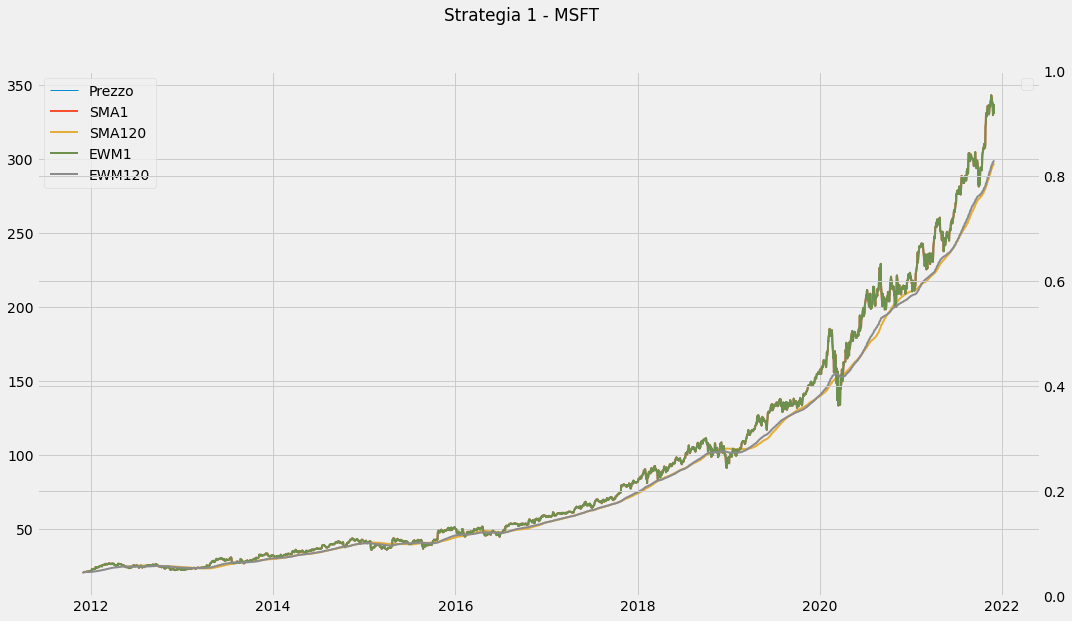

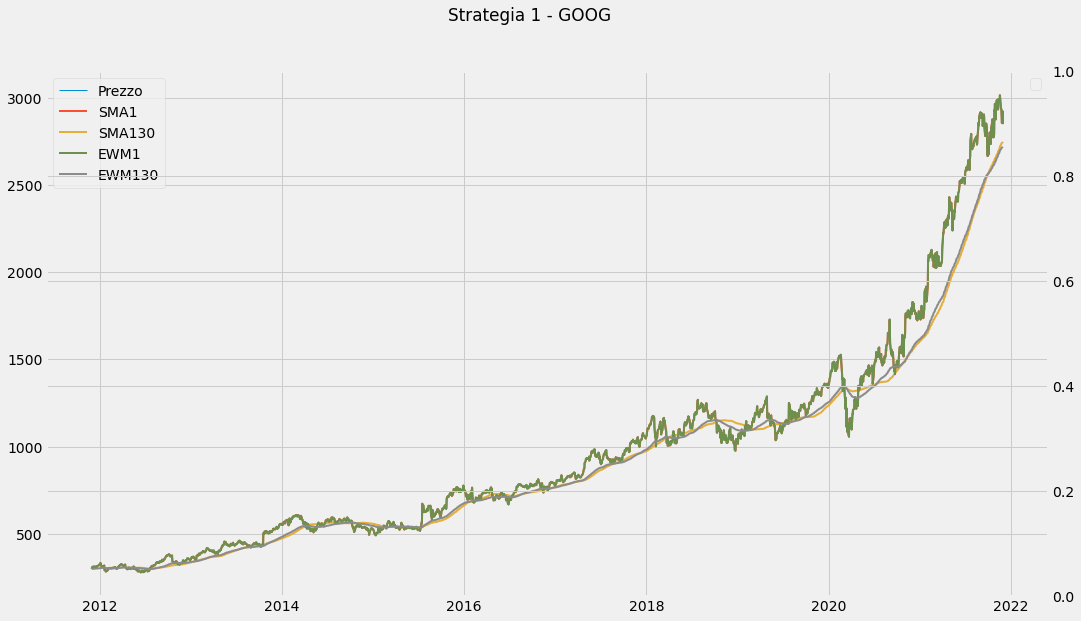

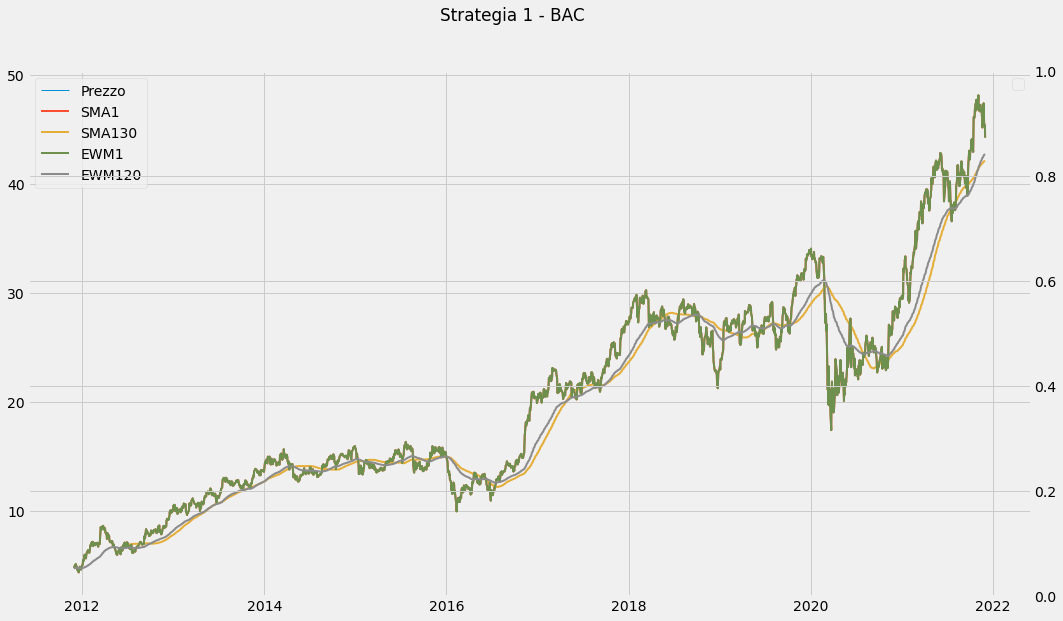

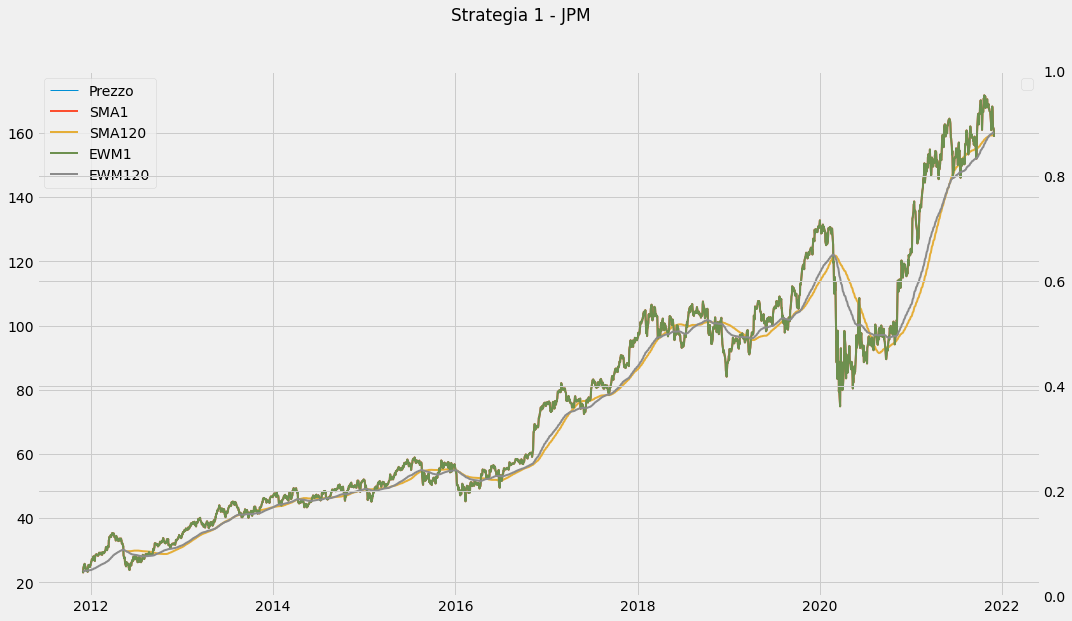

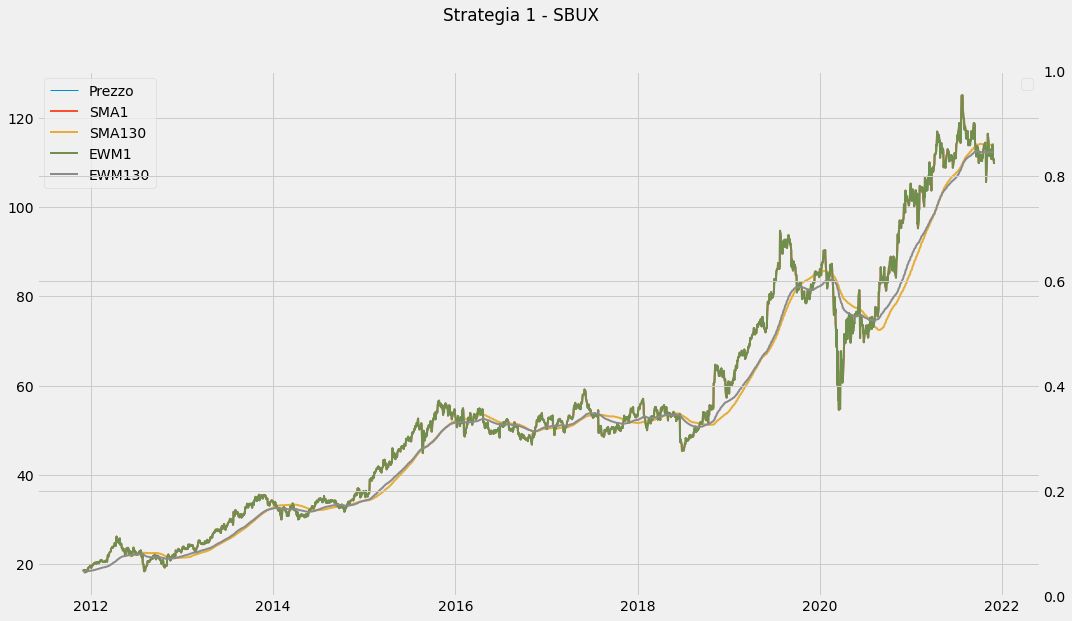

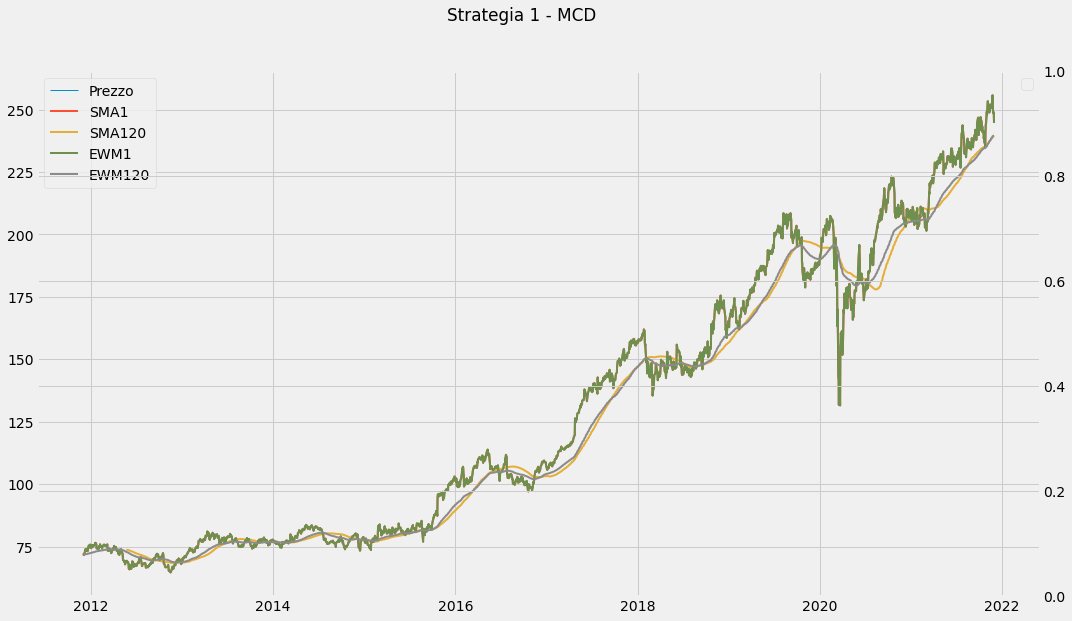

In [104]:
# Creo un grafico che contiene le migliori strategie
for ticker in tickers:
    data = datasets[ticker]['Adj Close']
    fig, ax1 = plt.subplots(figsize = (16, 9))
    fig.suptitle('Strategia 1 - ' + ticker)
    ax2 = ax1.twinx()
    ax1.plot(data, label = 'Prezzo', linewidth = 1)
    ax1.plot(data.rolling(best_parameters[ticker]['SMA'][0]).mean(), label = 'SMA' + str(best_parameters[ticker]['SMA'][0]), linewidth=2)
    ax1.plot(data.rolling(best_parameters[ticker]['SMA'][1]).mean(), label = 'SMA' + str(best_parameters[ticker]['SMA'][1]), linewidth=2)
    ax1.plot(data.ewm(span = best_parameters[ticker]['EWM'][0], adjust = False).mean(), label = 'EWM' + str(best_parameters[ticker]['EWM'][0]), linewidth = 2)
    ax1.plot(data.ewm(span = best_parameters[ticker]['EWM'][1], adjust = False).mean(), label = 'EWM' + str(best_parameters[ticker]['EWM'][1]), linewidth = 2)
    #ax2.plot(best_strategies[ticker]['Invested_SMA'], color = 'r', linestyle = 'dashed', label = 'Strategia MA', linewidth = 2)
    #ax2.plot(best_strategies[ticker]['Invested_EWM'], color = 'g', linestyle = 'dashed', label = 'Strategia EWM', linewidth = 2)
    ax2.legend()
    ax1.legend()

In [182]:
import itertools as it

# Scarico i dati del VIX
vix = web.get_data_yahoo('^VIX', start_date, end_date)['Adj Close']
best_vix_price_strategies = {}
best_vix_price_parameters = {}

for ticker in tickers:
    print(ticker)
    # Creo i range per gli intervalli di media mobile
    ma1 = range(1, 121, 3)
    ma2 = range(5, 281, 10)

    # Inizializzo le strutture dati che conterranno le migliori strategie e i relativi parametri
    best_vix_price_strategies[ticker] = pd.DataFrame()
    best_vix_price_parameters[ticker] = {'EWM': (None, None), 'MA':(None, None)}

    # scorro le possibili combinazioni di medie mobili
    for s1, s2 in it.product(ma1, ma2):
        if s1 < s2:
            s3 = 1
            s4 = 5
            ma1 = vix.rolling(s3).mean()
            ma2 = vix.rolling(s4).mean()
            ewm1 = vix.ewm(span = s3, adjust = False).mean()
            ewm2 = vix.ewm(span = s4, adjust = False).mean()

            price_ma1 = datasets[ticker]['Adj Close'].rolling(s1).mean()
            price_ma2 = datasets[ticker]['Adj Close'].rolling(s2).mean()
            price_ewm1 = datasets[ticker]['Adj Close'].ewm(span = s1, adjust = False).mean()
            price_ewm2 = datasets[ticker]['Adj Close'].ewm(span = s2, adjust = False).mean()

            invested_sma = [*[0], *[1 if
                        price_ma1.iloc[i] > price_ma2.iloc[i]
                                and
                           ma1.iloc[i - 1] < ma2.iloc[i - 1]
                            else 0 for i in range(1, len(datasets[ticker]))]]
            invested_ewm = [*[0], *[1 if
                            price_ewm1.iloc[i] > price_ewm2.iloc[i]
                                and
                           ewm1.iloc[i - 1] < ewm2.iloc[i - 1]
                            else 0 for i in range(1, len(datasets[ticker]))]]

            sma_returns = datasets[ticker]['Adj Close'].pct_change() + 1
            ewm_returns = datasets[ticker]['Adj Close'].pct_change() + 1

            # Aggiorno i rendimenti lordi a 1 dove non viene fatto alcun investimento, per non influire sul prodotto cumulato
            for i in range(len(invested_sma)):
                if invested_sma[i] == 0:
                    sma_returns.iloc[i] = 1
                if invested_ewm[i] == 0:
                    ewm_returns.iloc[i] = 1

            # Per considerare i ritorni aggiustati con le transazioni, moltiplico i ritorni finali dei periodi per il residuo netto del capitale
            for i in range(1, len(invested_sma)):
                if invested_sma[i] != invested_sma[i - 1]:
                    if invested_sma[i] == 1:
                        sma_returns[i] *= (1 - transaction_cost)
                    else:
                        sma_returns[i - 1] *= (1 - transaction_cost)
                if invested_ewm[i] != invested_ewm[i - 1]:
                    if invested_sma[i] == 1:
                        ewm_returns[i] *= (1 - transaction_cost)
                    else:
                        ewm_returns[i - 1] *= (1 - transaction_cost)


            # Calcolo i ritorni generati dalle strategie
            sma_returns = sma_returns.cumprod()
            ewm_returns = ewm_returns.cumprod()


            # Sostituisco eventuali strategie migliori nella struttura dati finale
            if best_vix_price_parameters[ticker]['MA'] == (None, None) or best_vix_price_strategies[ticker]['MA_Returns'].iloc[-1] < sma_returns.iloc[-1]:
                best_vix_price_strategies[ticker]['MA_Returns'] = sma_returns
                best_vix_price_strategies[ticker]['Invested_SMA'] = invested_sma
                best_vix_price_parameters[ticker]['MA'] = (s1, s2)

            if best_vix_price_parameters[ticker]['EWM'] == (None, None) or best_vix_price_strategies[ticker]['EWM_Returns'].iloc[-1] < ewm_returns.iloc[-1]:
                best_vix_price_strategies[ticker]['EWM_Returns'] = ewm_returns
                best_vix_price_strategies[ticker]['Invested_EWM'] = invested_ewm
                best_vix_price_parameters[ticker]['EWM'] = (s1, s2)

MSFT
GOOG
BAC
JPM
SBUX
MCD


In [205]:
print(best_vix_price_parameters)
best_par_vix_df = pd.DataFrame(index = ['Ritorno SMA', 'Ritorno EWM', 'Ritorno Buy and hold'])
best_parameters_vix_df = pd.DataFrame(index = ['SMA', 'EWM'])
for ticker in tickers:
    best_par_vix_df[ticker] = [best_vix_price_strategies[ticker]['MA_Returns'].iloc[-1], best_vix_price_strategies[ticker]['EWM_Returns'].iloc[-1],  datasets[ticker]['Compounded_returns'][-1]]
    print(best_vix_price_strategies[ticker]['EWM_Returns'].iloc[-1], best_vix_price_strategies[ticker]['MA_Returns'].iloc[-1], datasets[ticker]['Compounded_returns'][-1])
    best_parameters_vix_df[ticker] = [best_vix_price_parameters[ticker]['MA'], best_vix_price_parameters[ticker]['EWM']]

best_par_vix_df.to_latex('best_price_vix_strat.tex')
best_parameters_vix_df.to_latex('best_price_vix_parameters.tex')
print(best_par_vix_df)

{'MSFT': {'EWM': (1, 5), 'MA': (1, 5)}, 'GOOG': {'EWM': (1, 5), 'MA': (1, 5)}, 'BAC': {'EWM': (1, 5), 'MA': (1, 5)}, 'JPM': {'EWM': (1, 5), 'MA': (1, 5)}, 'SBUX': {'EWM': (1, 5), 'MA': (1, 5)}, 'MCD': {'EWM': (1, 5), 'MA': (1, 5)}}
19.53973896545296 17.766005336291233 15.96694523978782
31.22187333165577 22.933725837799454 9.542097526363643
87.1606086167538 63.31372945190973 9.401806117631121
19.103852303843883 14.794557140931781 6.7569729210416165
17.26429028242265 11.82365850370099 5.960535143274696
2.1684563296862485 1.970206606384332 3.3999665095968843
                           MSFT       GOOG        BAC        JPM       SBUX  \
Ritorno SMA           17.766005  22.933726  63.313729  14.794557  11.823659   
Ritorno EWM           19.539739  31.221873  87.160609  19.103852  17.264290   
Ritorno Buy and hold  15.966945   9.542098   9.401806   6.756973   5.960535   

                           MCD  
Ritorno SMA           1.970207  
Ritorno EWM           2.168456  
Ritorno Buy and hold  

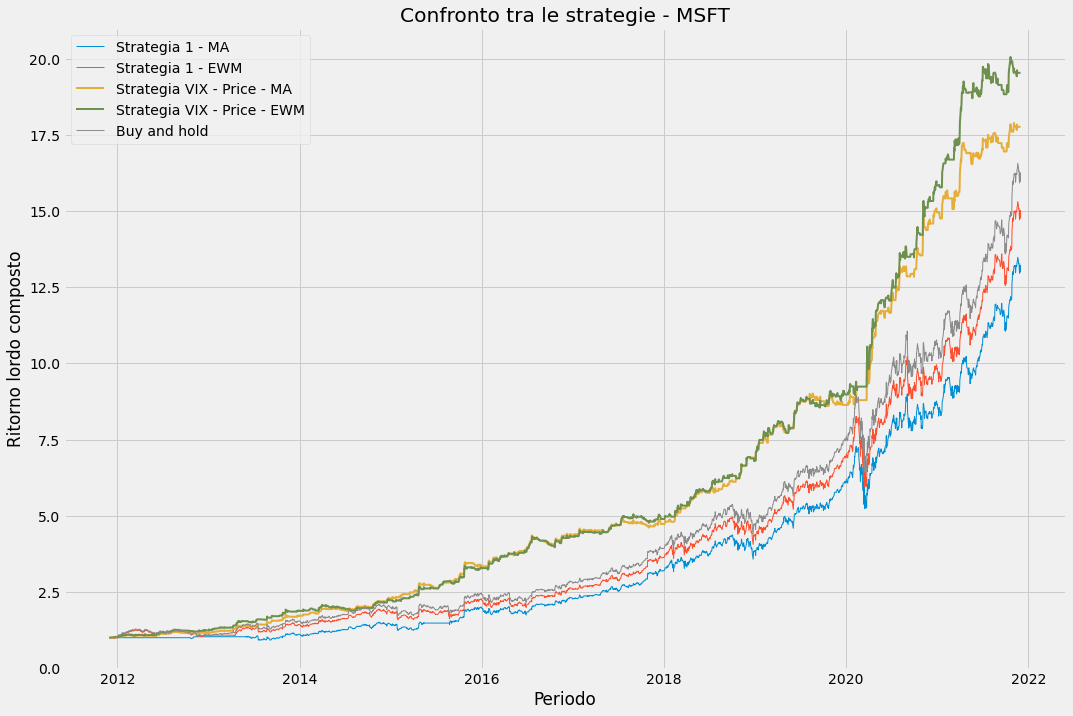

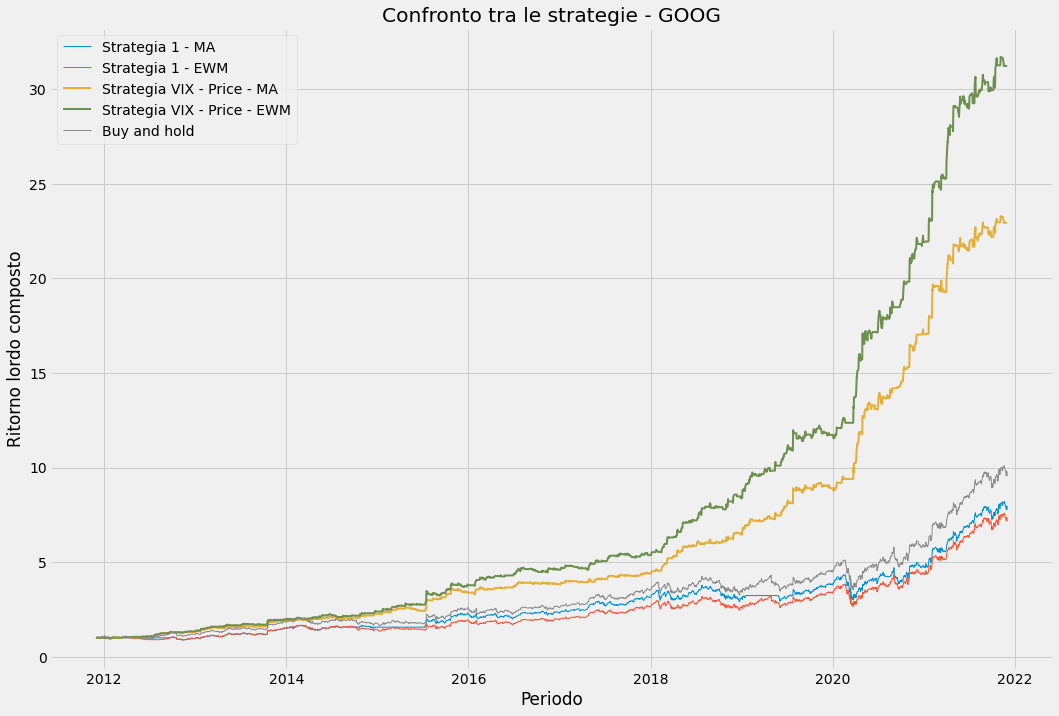

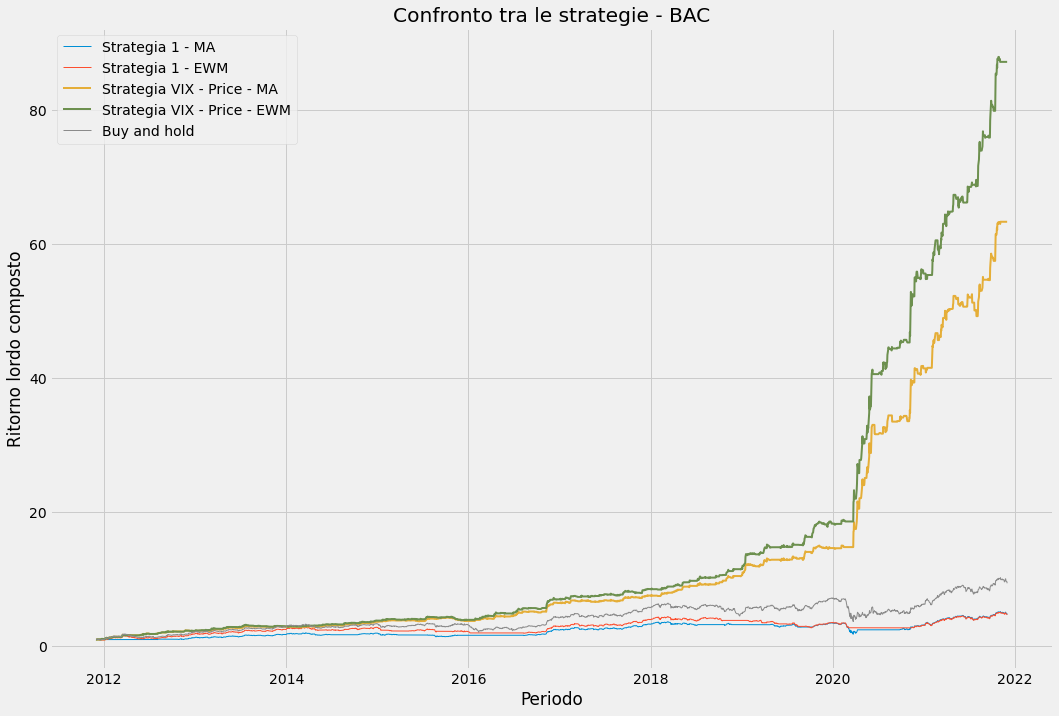

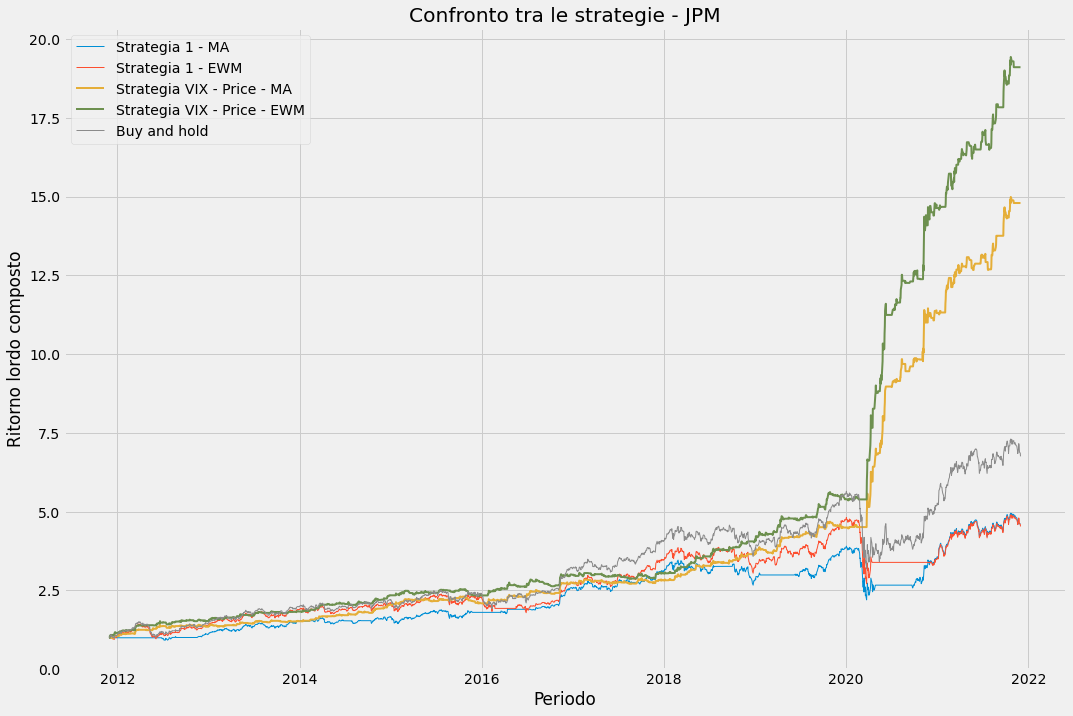

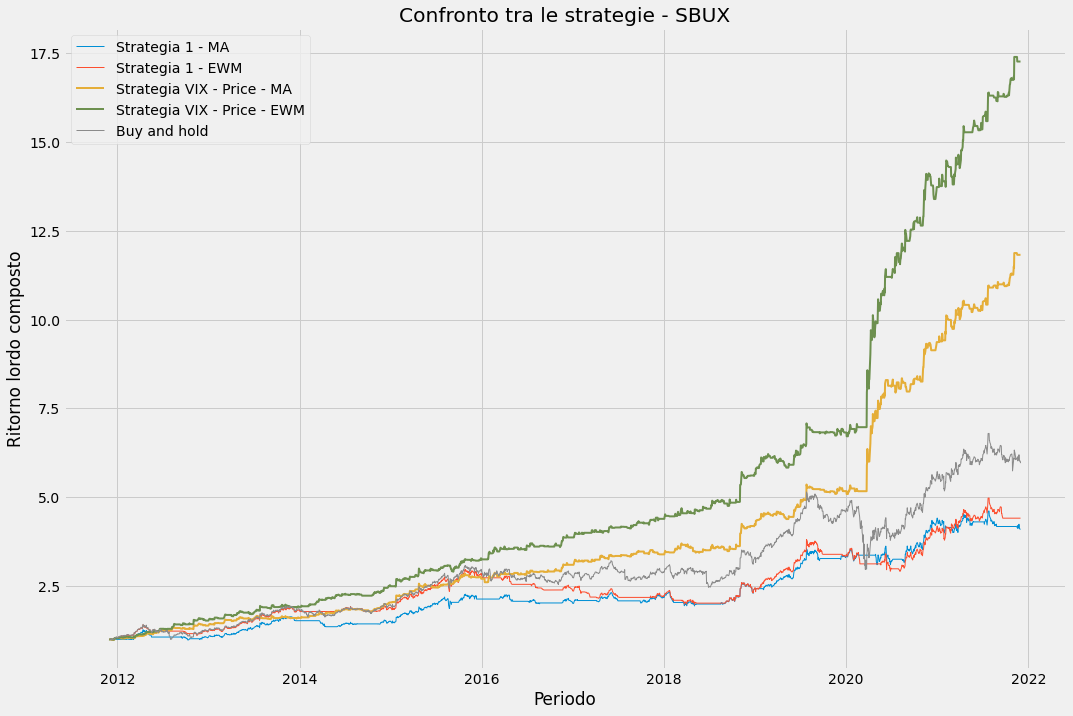

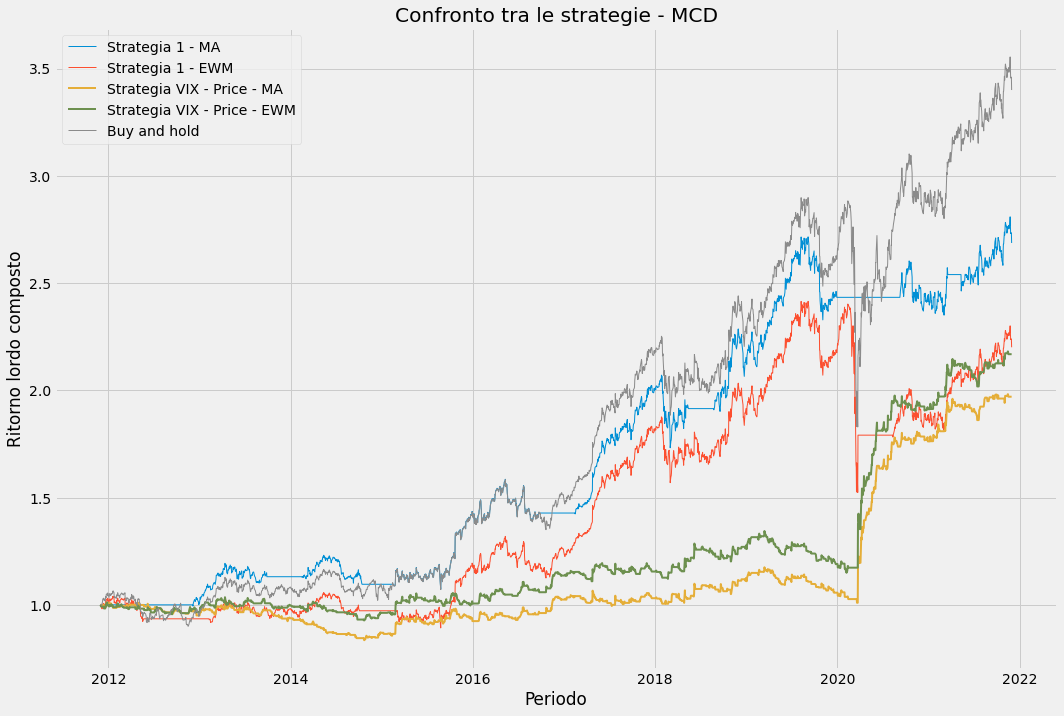

In [188]:

# Creo un grafico che contiene i ritorni composti di tutte le strategie per ogni stock.
for ticker in tickers:
    plt.figure(figsize=(16, 11))
    plt.title('Confronto tra le strategie - ' + ticker)
    plt.plot(best_strategies[ticker]['SMA_Returns'], label = 'Strategia 1 - MA', linewidth = 1)
    plt.plot(best_strategies[ticker]['EWM_Returns'], label = 'Strategia 1 - EWM', linewidth = 1)
    plt.plot(best_vix_price_strategies[ticker]['MA_Returns'], label = 'Strategia VIX - Price - MA', linewidth = 2)
    plt.plot(best_vix_price_strategies[ticker]['EWM_Returns'], label = 'Strategia VIX - Price - EWM', linewidth = 2)
    plt.plot(datasets[ticker]['Compounded_returns'], label = 'Buy and hold', linewidth=1)
    plt.xlabel('Periodo')
    plt.ylabel('Ritorno lordo composto')
    plt.legend()
    plt.savefig('./immagini/' + 'ritorni_strategie_' + ticker + '.png')

# Ottimizzazione di portafoglio


In [116]:
import numpy as np
import scipy.optimize as sco

# Creo un dataframe che contiene i ritorni semplici netti a granularità mensile
data = pd.DataFrame()
for ticker in tickers:
    data[ticker] = datasets[ticker]['Adj Close'].resample('M').last().pct_change().dropna()['2019-11-30':'2020-11-30']

# definisco la funzione da minimizzare durante la portfolio optimization
def volatility(w, rets, mat):
    return np.sqrt(np.dot(w.T, np.dot(mat, w)))

# Definisco la funzione che cerca i portafogli efficienti
def frontiera_efficiente_analitico(ritorni, cov_mat, range_ritorni):
    portafogli_efficienti = []

    # Definisco i limiti dei pesi
    bounds = tuple((0, 1) for i in range(len(ritorni)))
    initial_guess = len(ritorni) * [1 / len(ritorni),]

    # Risolvo il problema di ottimizzazione per ogni ritorno atteso prestabilito
    for ret in range_ritorni:
        # Stabilisco i vincoli del problema di minimizzazione:
        # 1 _ Il ritorno atteso del portafogli deve essere uguale a ret
        # 2_ La somma dei pesi deve essere uguale a 1
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(ritorni * x) - ret},
                      {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

        # Eseguo il problema di minimizzazione
        efficient_portfolio = sco.minimize(volatility,
                                           x0 = initial_guess,
                                           args= (ritorni, cov_mat), method='SLSQP',
                                           constraints=constraints,
                                           bounds=bounds)

        portafogli_efficienti.append(efficient_portfolio.x)
    return portafogli_efficienti

# Imposto il numero di unità per annualizzare i ritorni medi
n = 12

# Creo un dataframe che contiene i ritorni attesi, basati sui dati previsti con la rete neurale
expected_returns = pd.DataFrame()
for ticker in tickers:
    expected_returns[ticker] = np.asarray(predicted[ticker])

# Aggiungo le date come indice per fare resampling mensile
expected_returns.index = datasets[tickers[0]].index[datasets[tickers[0]].shape[0] - expected_returns.shape[0]:]
expected_returns = expected_returns.resample('M').last().pct_change().dropna()

# Calcolo i ritorni attesi per ogni stock facendo la media e annualizzandola
p_returns = expected_returns.mean() * n
r_returns = data.mean() * n

# Calcolo le frontiere sia con i dati previsti che con i 12 mese antecedenti al mese 108
frontiera_previsioni = frontiera_efficiente_analitico(p_returns, expected_returns.cov() * n, np.linspace(p_returns.min(), p_returns.max(), 200))
frontiera_passati = frontiera_efficiente_analitico(r_returns, data.cov() * n, np.linspace(r_returns.min(), r_returns.max(), 200))



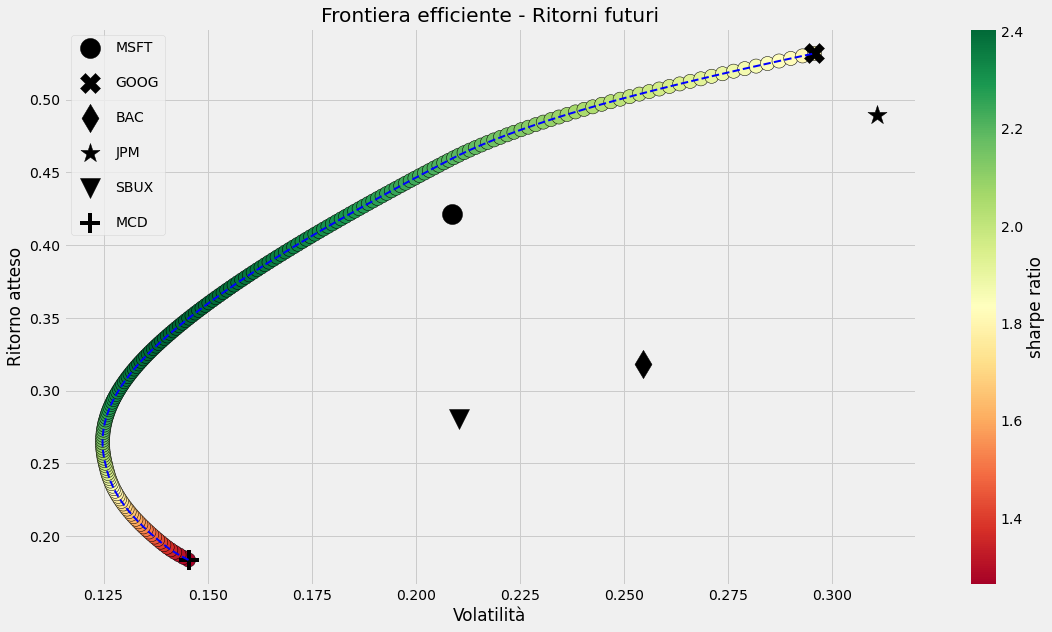

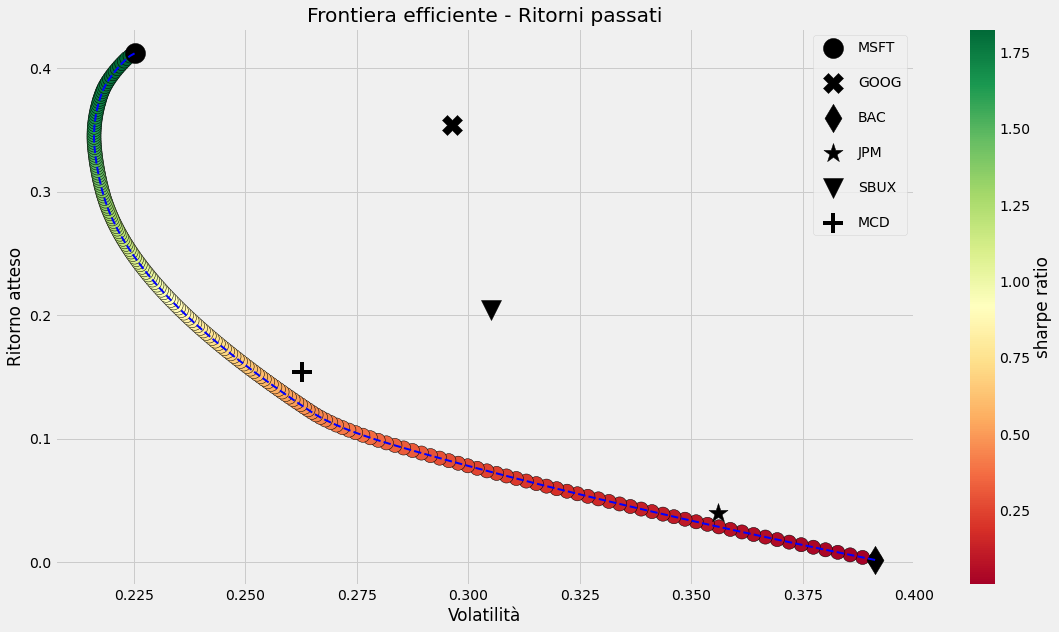

In [144]:
# Definisco una funzione che prende in input i pesi trovati al punto precendente e i ritorni attesi e restituisce un dataframe contenente i ritorni, la volatilità e lo sharpe ratio
# Parametri:
# frontier: la lista delle combinazioni di pesi
# exp_rets: I ritorni medi attesi
# return_list: la sequenza dei ritorni durante il periodo
# n: il moltiplicatore per annualizzare i ritorni
def get_portfolio_results(frontier, exp_rets, return_list, n):
    weights = []
    rets = []
    volatilities = []
    sr = []

    # Per ogni combinazione di pesi, calcola le varia statistiche del portafogli associato
    for p in frontier:
        ret = np.sum(p * return_list)
        vol = np.sqrt(np.dot(p.T, np.dot(exp_rets.cov() * n, p)))
        s_r = ret / vol
        rets.append(ret)
        weights.append(p)
        volatilities.append(vol)
        sr.append(s_r)

    result = pd.DataFrame({'weights': weights, 'returns' : rets, 'volatility': volatilities, 'sharpe ratio': sr})
    return result

# Funzione che crea il grafico di una frontiera efficiente
def plot_frontier(result, tickers, ret_list, expected_returns, n, name):
    MARKS = ['o', 'X', 'd', '*', 'v', '+']

    fig, ax = plt.subplots(figsize = (16, 9))
    result.plot(kind='scatter', x='volatility', s = 200,
                          y='returns', c='sharpe ratio',
                          cmap='RdYlGn', edgecolors='black',
                          ax=ax)
    ax.set(xlabel='Volatilità',
           ylabel='Ritorno atteso',
           title=name)
    ax.plot(result['volatility'], result['returns'], 'b--', linewidth = 2)

    for asset_index in range(6):
        ax.scatter(x=np.sqrt((ret_list.cov() * n).iloc[asset_index, asset_index]),
                   y=expected_returns[asset_index],
                   marker=MARKS[asset_index],
                   s=400,
                   color='black',
                   label=tickers[asset_index]
                   )
    ax.legend(labelspacing = 1.5)

    plt.tight_layout()
    plt.savefig('./immagini/' + name + '.png')
    plt.show()

a = get_portfolio_results(frontiera_previsioni, expected_returns, p_returns, n)
b = get_portfolio_results(frontiera_passati, data, r_returns, n)

plot_frontier(a, tickers, expected_returns, p_returns, n, 'Frontiera efficiente - Ritorni futuri')
plot_frontier(b, tickers, data, r_returns, n, 'Frontiera efficiente - Ritorni passati')

In [119]:
# Cerco i portafogli che massimizzano lo Sharpe Ratio

# Definisco una funzione di appoggio che calcola il beta. Parametri:
# returns: la lista dei ritorni di un titolo
# benchmark: la lista dei ritorni dell 'indice di benchamrk
# start, end: il periodo considerato per il calcolo del beta
def beta(returns, benchmark, start, end):
    temp_df = pd.DataFrame()
    temp_df['Ret'] = returns.loc[start:end]
    temp_df['Benchmark'] = benchmark.loc[start:end]
    cm = temp_df.cov()
    return cm['Ret']['Benchmark'] / cm['Benchmark']['Benchmark']

# Cerco i portafogli con lo sharpe ratio massimo
best_pred_portfolio = a.iloc[a['sharpe ratio'].idxmax()]
best_past_portfolio = b.iloc[b['sharpe ratio'].idxmax()]

print(best_past_portfolio['sharpe ratio'], np.round(best_past_portfolio['weights'], 3))
print(best_pred_portfolio['sharpe ratio'], np.round(best_pred_portfolio['weights'], 3))


# Calcolo i beta dei portafogli come la somma dei beta dei singoli stock pesata per la loro quota nel portafogli
beta_past_portfolio = 0
beta_pred_portfolio = 0
for i in range(0, len(tickers)):
    beta_past_portfolio += best_past_portfolio['weights'][i] * beta(datasets[tickers[i]]['Adj Close'].resample('M').last().pct_change(), sp500['Adj Close'].resample('M').last().pct_change(), '2019-12-01', '2020-11-30')
    beta_pred_portfolio += best_pred_portfolio['weights'][i] * beta(datasets[tickers[i]]['Adj Close'].resample('M').last().pct_change(), sp500['Adj Close'].resample('M').last().pct_change(), '2021-01-30', '2021-11-30')

print(beta_past_portfolio, beta_pred_portfolio)

1.8291941331732615 [1. 0. 0. 0. 0. 0.]
2.4065923471108412 [0.439 0.022 0.    0.155 0.    0.384]
1.1240321371638007 0.9039234035372902


In [133]:
# Confronto i rendimenti attesi con quelli effettivi

def get_real_return(weights, tickers, expected_returns, start_date, end_date, dataset, n):
    expected_return = np.sum(weights * expected_returns)
    real_returns = pd.DataFrame()
    for ticker in tickers:
        real_returns[ticker] = dataset[ticker]['Adj Close'].resample('M').last().pct_change()[start_date:end_date]
    real_returns = real_returns.mean() * n
    real_portfolio_return = np.sum(weights * real_returns)
    return real_portfolio_return

past_return = np.sum(best_past_portfolio['weights'] * r_returns)
real_past_return = get_real_return(best_past_portfolio['weights'], tickers, r_returns, '2020-12-01', '2021-11-30', datasets, n)

pred_return = np.sum(best_pred_portfolio['weights'] * p_returns)
real_pred_return = get_real_return(best_pred_portfolio['weights'], tickers, p_returns, '2021-01-30', '2021-11-30', datasets, n)
print(past_return, real_past_return)
print(pred_return, real_pred_return)



0.411812109032035 0.46976465542497814
0.34283257758797114 0.33123732315664894
